# Lecture 1: Introduction to Machine Learning

# Supervised Learning

The most common approach to machine learning is supervised learning.

<center><img width=70% src="img/tesla_data.png"/></center>

1. First, we collect a dataset of labeled training examples.
2. We train a model to output accurate predictions on this dataset.
3. When the model sees new, similar data, it will also be accurate.

We can use this dataset of examples to fit a supervised learning model.

* The model maps input $x$ (the education level) to output a $y$ (the house price).
* It learns the mapping from our dataset of examples $(x, y)$.

Why?
* Making predictions on new data.
* Understanding the mechanisms through which input variables affect targets.

# Unsupervised Learning

Here, we have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:
* Clusters hidden in the dataset.
* Outliers: particularly unusual and/or interesting datapoints.
* Useful signal hidden in noise, e.g. human speech over a noisy phone.

We can use this dataset of examples to fit an unsupervised learning model.
* **The model defines a probability distribution over the inputs.**
* The probability distribution identifies multiple components (multiple peaks).
* The components indicate structure in the data.

Unsupervised learning also has numerous applications:
* Recommendation systems: suggesting movies on Netflix.
* Anomaly detection: identifying factory components that are likely to break soon.
* Signal denoising: extracting human speech from a noisy recording.

# Reinforcement Learning

In reinforcement learning, an agent is interacting with the world over time. We teach it good behavior by providing it with rewards.

<center><img src="img/rl.png"/></center>

<sub><sup>Image by Lily Weng</sup></sub>

Applications of reinforcement learning include:
* Creating agents that play games such as Chess or Go.
* Controling the cooling systems of datacenters to use energy more efficiently.
* Designing new drug compounds.

# Lecture 2: Supervised Machine Learning

# Summary: Components of a Supervised Machine Learning Problem

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

We can also define the high-level structure of a supervised learning algorithm as consisting of three components:
* A __model class__: the set of possible models we consider.
* An __objective__ function, which defines how good a model is.
* An __optimizer__, which finds the best predictive model in the model class according to the objective function

# Supervised Machine Learning: BMI and Diabate Risk Case
## Model Class
Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.
## Optimizer
Given our assumption that $x,y$ follow the a linear relationship, the goal of a supervised learning algorithm is to find a good set of parameters consistent with the data.
## Predictive Model
The supervised learning algorithm gave us a pair of parameters $\theta_1^*, \theta_0^*$. These define the *predictive model* $f^*$, defined as
$$ f(x) = \theta_1^* \cdot x + \theta_0^*, $$
where again $x$ is the BMI, and $y$ is the diabetes risk score.

# Training Dataset
## Inputs

More precisely, an input $x^{(i)} \in \mathcal{X}$ is a $d$-dimensional vector of the form
$$ x^{(i)} = \begin{bmatrix}
x^{(i)}_1 \\
x^{(i)}_2 \\
\vdots \\
x^{(i)}_d
\end{bmatrix}$$
For example, it could be the values of the $d$ features for patient $i$.

The set $\mathcal{X}$ is called the feature space. Often, we have, $\mathcal{X} = \mathbb{R}^d$.

## Attributes

We refer to the numerical variables describing the patient as *attributes*. Examples of attributes include:
* The age of a patient.
* The patient's gender.
* The patient's BMI.

## Features
Often, an input object has many attributes, and we want to **use these attributes to define more complex descriptions of the input.**

* Is the patient old and a man? (Useful if old men are at risk).
* Is the BMI above the obesity threshold?

We call these custom attributes *features*.

Oldman feature:
diabetes_X['old_man'] = (diabetes_X['sex'] > 0) & (diabetes_X['age'] > 0.05)

We may denote features via a function $\phi : \mathcal{X} \to \mathbb{R}^p$ that takes an input $x^{(i)} \in \mathcal{X}$ and outputs a $p$-dimensional vector
$$ \phi(x^{(i)}) = \left[\begin{array}{@{}c@{}}
\phi(x^{(i)})_1 \\
\phi(x^{(i)})_2 \\
\vdots \\
\phi(x^{(i)})_p
\end{array} \right]$$
We say that $\phi(x^{(i)})$ is a *featurized* input, and each $\phi(x^{(i)})_j$ is a *feature*.

### Features: Discrete vs. Continuous 

Features can be either discrete or continuous. We will see that some ML algorthims handle these differently.

## Targets

For each patient, we are interested in predicting a quantity of interest, the *target*. In our example, this is the patient's diabetes risk.

Formally, when $(x^{(i)}, y^{(i)})$ form a *training example*, each $y^{(i)} \in \mathcal{Y}$ is a target. We call $\mathcal{Y}$ the target space.

### Targets: Regression vs. Classification

We distinguish between two broad types of supervised learning problems that differ in the form of the target variable.

1. __Regression__: The target variable $y$ is continuous. We are fitting a curve in a high-dimensional feature space that approximates the shape of the dataset.
2. __Classification__: The target variable $y$ is discrete. Each discrete value corresponds to a *class* and we are looking for a hyperplane that separates the different classes.

# Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{Y} \}$$
of possible models that map input features to targets.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid \theta \in \Theta \}.$$

# Model Class: Example

One simple approach is to assume that $x$ and $y$ are related by a linear model of the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x$ is a featurized input and $y$ is the target.

The $\theta_j$ are the *parameters* of the model, $\Theta = \mathbb{R}^{d+1}$, and $\mathcal{M} = \{ \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d \mid \theta \in \mathbb{R}^{d+1} \}$
<!-- By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ y = \sum_{j=0}^d \beta_j \cdot x_j = \vec \beta \cdot \vec x. $$
where $\vec x$ is a vector of features. -->

# Objectives: Notation

<!-- Given a training set, how do we pick the parameters $\theta$ for the model? A natural approach is to select $\theta$ such that $f_\theta(x^{(i)})$ is close to $y^{(i)}$ on a training dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$. -->

To capture this intuition, we define an *objective function* (also called a *loss function*)
$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

# Objective: Examples

What would are some possible objective functions? We will see many, but here are a few examples:
* Mean squared error: $$J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2$$
* Absolute (L1) error: $$J(\theta) = \frac{1}{n} \sum_{i=1}^n \left| f_\theta(x^{(i)}) - y^{(i)} \right|$$

These are defined for a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$.

# Optimizer: Notation

At a high-level an optimizer takes an objective $J$ and a model class $\mathcal{M}$ and finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.

\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

# Optimizer: Example

We will see that behind the scenes, the `sklearn.linear_models.LinearRegression` algorithm optimizes the MSE loss.

\begin{align*}
\min_{\theta \in \mathbb{R}} \frac{1}{2n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2
\end{align*}

We can easily measure the quality of the fit on the training set and the test set.

# Notation: Feature Matrix

Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features.

#### Feature Matrix
Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:
$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(2)}_1 & \ldots & x^{(n)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\
\vdots \\
x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d
\end{bmatrix}.$$

Similarly, we can vectorize the target variables into a vector $y \in \mathbb{R}^n$ of the form
$$ y = \begin{bmatrix}
x^{(1)} \\
x^{(2)} \\
\vdots \\
x^{(n)}
\end{bmatrix}.$$

# Lecture 3: Linear Regression

# Calculus Review: Derivatives

Recall that the derivative $$\frac{d f(\theta_0)}{d \theta}$$ of a univariate function $f : \mathbb{R} \to \mathbb{R}$ is the instantaneous rate of change of the function $f(\theta)$ with respect to its parameter $\theta$ at the point $\theta_0$.

# Calculus Review: Partial Derivatives

The partial derivative $$\frac{\partial f(\theta)}{\partial \theta_j}$$ of a multivariate function $f : \mathbb{R}^d \to \mathbb{R}$ is the derivative of $f$ with respect to $\theta_j$ while all the other dimensions $\theta_k$ for $k\neq j$ are fixed.

# Calculus Review: The Gradient

The gradient $\nabla f$ is the vector of all the partial derivatives:

$$ \nabla f (\theta) = \begin{bmatrix}
\frac{\partial f(\theta)}{\partial \theta_1} \\
\frac{\partial f(\theta)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla f (\theta)$ is the partial derivative $\frac{\partial f(\theta)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

**The gradient, represented by the blue arrows, denotes the direction of greatest change of a scalar function.**

# Calculus Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

The $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

# Gradient Descent: Intuition

Gradient descent is a very common optimization algorithm used in machine learning.

The intuition behind gradient descent is to repeatedly obtain the gradient to determine the direction in which the function decreases most steeply and take a step in that direction.

# Gradient Descent: Notation
More formally, if we want to optimize $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until $\theta$ is no longer changing:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla J(\theta_{i-1}). $$

In code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while norm(theta - theta_prev) > convergence_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```
In the above algorithm, we stop when $||\theta_i - \theta_{i-1}||$ is small.

# Resource on Gradient Descent: https://www.cnblogs.com/pinard/p/5970503.html  

那么这个梯度向量求出来有什么意义呢？他的意义从几何意义上讲，就是函数变化增加最快的地方。具体来说，对于函数f(x,y),在点(x0,y0)，沿着梯度向量的方向就是(∂f/∂x0, ∂f/∂y0)T的方向是f(x,y)增加最快的地方。或者说，沿着梯度向量的方向，更加容易找到函数的最大值。反过来说，沿着梯度向量相反的方向，也就是 -(∂f/∂x0, ∂f/∂y0)T的方向，梯度减少最快，也就是更加容易找到函数的最小值。

在机器学习算法中，在最小化损失函数时，可以通过梯度下降法来一步步的迭代求解，得到最小化的损失函数，和模型参数值。反过来，如果我们需要求解损失函数的最大值，这时就需要用梯度上升法来迭代了。

# Review: Linear Model Family

Recall that a linear model has the form
\begin{align*}
y & = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + ... + \theta_d \cdot x_d
\end{align*}
where $x \in \mathbb{R}^d$ is a vector of features and $y$ is the target. The $\theta_j$ are the *parameters* of the model.

By using the notation $x_0 = 1$, we can represent the model in a vectorized form
$$ f_\theta(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

# An Objective: Mean Squared Error

We pick $\theta$ to minimize the mean squared error (MSE). Slight variants of this objective are also known as the residual sum of squares (RSS) or the sum of squared residuals (SSR).
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
In other words, we are looking for the best compromise in $\theta$ over all the data points.

# Mean Squared Error: Partial Derivatives

Let's work out the derivatives for $\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2,$ the MSE of a linear model $f_\theta$ for one training example $(x^{(i)}, y^{(i)})$, which we denote $J^{(i)}(\theta)$.

\begin{align*}
\frac{\partial}{\partial \theta_j} J^{(i)}(\theta) & = \frac{\partial}{\partial \theta_j} \left(\frac{1}{2} \left( f_\theta(x^{(i)}) - y^{(i)} \right)^2\right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( f_\theta(x^{(i)}) - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot \frac{\partial}{\partial \theta_j} \left( \sum_{k=0}^d \theta_k \cdot x^{(i)}_k - y^{(i)} \right) \\
& = \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_j
\end{align*}

# Mean Squared Error: The Gradient

We can use this derivation to obtain an expression for the gradient of the MSE for a linear model
\begin{align*}
\small
{\tiny \nabla_\theta J^{(i)} (\theta)} = \begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\begin{bmatrix}
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_0 \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_1 \\
\vdots \\
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}_d
\end{bmatrix}
=
\left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

Note that the MSE over the entire dataset is $J(\theta) = \frac{1}{n}\sum_{i=1}^n J^{(i)}(\theta)$. Therefore:
\begin{align*}
\nabla_\theta J (\theta) = \begin{bmatrix}
\frac{\partial J(\theta)}{\partial \theta_0} \\
\frac{\partial J(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n}\sum_{i=1}^n
\begin{bmatrix}
\frac{\partial J^{(i)}(\theta)}{\partial \theta_0} \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_1} \\
\vdots \\
\frac{\partial J^{(i)}(\theta)}{\partial \theta_d}
\end{bmatrix}
=
\frac{1}{n} \sum_{i=1}^n \left( f_\theta(x^{(i)}) - y^{(i)} \right) \cdot x^{(i)}
\end{align*}

# Gradient Descent for Linear Regression

Putting this together with the gradient descent algorithm, we obtain a learning method for training linear models.


```python
theta, theta_prev = random_initialization()
while abs(J(theta) - J(theta_prev)) > conv_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * (f(x, theta)-y) * x
```

This update rule is also known as the Least Mean Squares (LMS) or Widrow-Hoff learning rule.

# Algorithm: Ordinary Least Squares

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: Mean squared error
* __Optimizer__: Normal equations

# Notation: Design Matrix

<!-- Suppose that we have a dataset of size $n$ (e.g., $n$ patients), indexed by $i=1,2,...,n$. Each $x^{(i)}$ is a vector of $d$ features. -->

Machine learning algorithms are most easily defined in the language of linear algebra. Therefore, it will be useful to represent the entire dataset as one matrix $X \in \mathbb{R}^{n \times d}$, of the form:

$$ X = \begin{bmatrix}
x^{(1)}_1 & x^{(1)}_2 & \ldots & x^{(1)}_d \\
x^{(2)}_1 & x^{(2)}_2 & \ldots & x^{(2)}_d \\
\vdots \\
x^{(n)}_1 & x^{(n)}_2 & \ldots & x^{(n)}_d
\end{bmatrix}
=
\begin{bmatrix}
- & (x^{(1)})^\top & - \\
- & (x^{(2)})^\top & - \\
& \vdots & \\
- & (x^{(n)})^\top & - \\
\end{bmatrix}
.$$

# Squared Error in Matrix Form

Recall that we may fit a linear model by choosing $\theta$ that minimizes the squared error:
$$J(\theta)=\frac{1}{2}\sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$

We can write this sum in matrix-vector form as:
$$J(\theta) = \frac{1}{2} (y-X\theta)^\top(y-X\theta) = \frac{1}{2} \|y-X\theta\|^2,$$
where $X$ is the design matrix and $\|\cdot\|$ denotes the Euclidean norm.

# The Gradient of the Squared Error

We can compute the gradient of the mean squared error as follows.

\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \frac{1}{2} (X \theta - y)^\top  (X \theta - y) \\
& = \frac{1}{2} \nabla_\theta \left( (X \theta)^\top  (X \theta) - (X \theta)^\top y - y^\top (X \theta) + y^\top y \right) \\
& = \frac{1}{2} \nabla_\theta \left( \theta^\top  (X^\top X) \theta - 2(X \theta)^\top y \right) \\
& = \frac{1}{2} \left( 2(X^\top X) \theta - 2X^\top y \right) \\
& = (X^\top X) \theta - X^\top y
\end{align*}

We used the facts that $a^\top b = b^\top a$ (line 3), that $\nabla_x b^\top x = b$ (line 4), and that $\nabla_x x^\top A x = 2 A x$ for a symmetric matrix $A$ (line 4).

# Normal Equations

<!-- We know from calculus that a function is minimized when its derivative is set to zero. In our case, our objective function is a (multivariate) quadratic; hence it only has one minimum, which is the global minimum.
 -->
Setting the above derivative to zero, we obtain the *normal equations*:
$$ (X^\top X) \theta = X^\top y.$$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

# Algorithm: Non-Linear Least Squares

* __Type__: Supervised learning (regression)
* __Model family__: Linear in the parameters; non-linear with respect to raw inputs.
* __Features__: Non-linear functions of the attributes
* __Objective function__: Mean squared error
* __Optimizer__: Normal equations

# Modeling Non-Linear Relationships With Polynomial Regression

<!-- Note that the set of $p$-th degree polynomials forms a linear model with parameters $a_p, a_{p-1}, ..., a_0$.
This means we can use our algorithms for linear models to learn non-linear features! -->

Specifically, given a one-dimensional continuous variable $x$, we can define the *polynomial feature* function $\phi : \mathbb{R} \to \mathbb{R}^{p+1}$ as
$$ \phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^p
\end{bmatrix}.
$$

The class of models of the form
$$ f_\theta(x) := \sum_{j=0}^p \theta_p x^p = \theta^\top \phi(x) $$
with parameters $\theta$ and polynomial features $\phi$ is the set of $p$-degree polynomials.

* This model is non-linear in the input variable $x$, meaning that we can model complex data relationships.

* It is a linear model as a function of the parameters $\theta$, meaning that we can use our familiar ordinary least squares algorithm to learn these features.

# Multivariate Polynomial Regression

We can construct non-linear functions of multiple variables by using multivariate polynomials.

For example, a polynomial of degree $2$ over two variables $x_1, x_2$ is a function of the form
<!-- $$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{22} x_1^2 x_2^2 + a_{21} x_1^2 x_2 + a_{12} x_1 x_2^2 + a_11 x_1 x_2 + a_{00}.
$$ -->
$$
a_{20} x_1^2 + a_{10} x_1 + a_{02} x_2^2 + a_{01} x_2 + a_{11} x_1 x_2 + a_{00}.
$$

In general, a polynomial of degree $p$ over two variables $x_1, x_2$ is a function of the form
$$
f(x_1, x_2) = \sum_{i,j \geq 0 : i+j \leq p} a_{ij} x_1^i x_2^j.
$$

In our two-dimensional example, this corresponds to a feature function $\phi : \mathbb{R}^2 \to \mathbb{R}^6$ of the form
$$ \phi(x) = \begin{bmatrix}
1 \\
x_1 \\
x_1^2 \\
x_2 \\
x_2^2 \\
x_1 x_2
\end{bmatrix}.
$$

The same approach can be used to specify polynomials of any degree and over any number of variables.

# Towards General Non-Linear Features

Any non-linear feature map $\phi(x) : \mathbb{R}^d \to \mathbb{R}^p$ can be used in this way to obtain general models of the form
$$ f_\theta(x) := \theta^\top \phi(x) $$
that are highly non-linear in $x$ but linear in $\theta$.

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 4: Classification and Logistic Regression

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Review: Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

# Binary Classification

An important special case of classification is when the number of classes $K=2$.

In this case, we have an instance of a *binary classification* problem.

# Understanding Classification

How is clasification different from regression?
* In regression, we try to fit a curve through the set of targets $y^{(i)}$.
* In classification, classes define a partition of the feature space, and our goal is to find the boundaries that separate these regions.
* Outputs of classification models often have a simple probabilistic interpretation: they are probabilities that a data point belongs to a given class.

# Review: Least Squares

Recall that the linear regression algorithm fits a linear model of the form
$$ f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x. $$

It minimizes the mean squared error (MSE)
$$J(\theta)= \frac{1}{2n} \sum_{i=1}^n(y^{(i)}-\theta^\top x^{(i)})^2$$
on a dataset $\{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We could use least squares to solve our classification problem, setting $\mathcal{Y} = \{0, 1\}$.

Ordinary least squares returns a decision boundary that is not unreasonable.

However, applying ordinary least squares is problematic for a few reasons.
* There is nothing to prevent outputs larger than one or smaller than zero, which is conceptually wrong
* We also don't have optimal performance: at least one point is misclassified, and others are too close to the decision boundary.

# The Logistic Function

To address the fact that the output of linear regression is not in $[0,1]$, we will instead attempt to *squeeze* it into that range using
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
This is known as the *sigmoid* or *logistic* function.

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" points from the real line into $[0,1]$.

# The Logistic Function: Properties

The sigmoid function is defined as
$$ \sigma(z) = \frac{1}{1 + \exp(-z)}. $$
A few observations:

* The function tends to 1 as $z \to \infty$ and tends to 0 as $z \to -\infty$.

* Thus, models of the form $\sigma(\theta^\top x)$ output values between 0 and 1, which is suitable for binary classification.

* It is easy to show that the derivative of $\sigma(z)$ has a simple form:
$\frac{d\sigma}{dz} = \sigma(z)(1-\sigma(z)).$

Note that logistic regression is actually a binary __classification__ algorithm.

The term *regression* is an unfortunate historical misnomer.

# Probabilistic Interpretations

The logistic model can be interpreted to output a probability, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

Recall that a probability over $y\in \{0,1\}$ is called **Bernoulli.**

# The Data Distribution

We will assume that our dataset is sampled from a probability distribution $\mathbb{P}$, which we will call the *data distribution*. We will denote this as
$$ x, y \sim P_\text{data}. $$

The training set $\mathcal{D} = \{(x^{(i)}, y^{(i)}) \mid i = 1,2,...,n\}$ consists of *independent and identicaly distributed* (IID) samples from $P_\text{data}$.

# Data Distribution: IID Sampling

The key assumption is that the training examples are *independent and identicaly distributed* (IID). 
* Each training example is from the same distribution.
* This distribution doesn't depend on previous training examples.

__Example__: Flipping a coin. Each flip has same probability of heads & tails and doesn't depend on previous flips.

__Counter-Example__: Yearly census data. The population in each year will be close to that of the previous year.

# Data Distribution: Motivation

Why assume that the dataset is sampled from a distribution?

* The process we model may be effectively random. If $y$ is a stock price, there is randomness in the market that cannot be captured by a deterministic model.
* There may be noise and randomness in the data collection process itself (e.g., collecting readings from an imperfect thermometer).
* We can use probability and statistics to analyze supervised learning algorithms and prove that they work.

# Probabilistic Interpretations

Many supervised learning models have a probabilistic interpretation.
Often a model $f_\theta$ defines a probability distribution of the form

\begin{align*}
P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1] && \text{or} && P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1].
\end{align*}

We refer to these as *probabilistic models*.

For example, our logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

# Maximum Likelihood

We can train any model that defines a probability distribution $P_\theta(x,y)$ by optimizing
the *maximum likelihood* objective
$$
L(\theta) = \prod_{i=1}^n P_\theta({x}^{(i)}, y^{(i)})
$$
defined over a dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.


This asks that $P_\theta$ assign a high probability to the training instances in the dataset $\mathcal{D}$.

A lot of mathematical derivations and numerical calculations become simpler if we instead maximize the log of the likelihood:
\begin{align*}
\ell(\theta) = \log L(\theta) & = \log \prod_{i=1}^n P_\theta({x}^{(i)}, y^{(i)}) = \sum_{i=1}^n \log P_\theta({x}^{(i)}, y^{(i)}).
\end{align*}
Note that since the log is a monotonically increasing function, it doesn't change the optimal $\theta$.

Finally, it's often simpler to take the average, instead of the sum. This gives us the following learning principle, known as *maximum log-likelihood*:
$$
\max_\theta \ell(\theta) = \max_{\theta} \frac{1}{n}\sum_{i=1}^n \log P_\theta({x}^{(i)}, y^{(i)}).
$$

# Example: Flipping a Random Coin

Our log-likelihood function is
\begin{eqnarray}
\nonumber
L(\theta) &=& \theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}\\
\nonumber
\log L(\theta) &=& \log(\theta^{\#\,\text{heads}} \cdot (1-\theta)^{\#\,\text{tails}}) \\
\nonumber
&=& \#\,\text{heads} \cdot \log(\theta) + \#\,\text{tails} \cdot \log(1-\theta)
\end{eqnarray}
The maximum likelihood estimate is the $\theta^* \in [0,1]$ such that $\log L(\theta^*)$ is maximized.

Differentiating the log-likelihood function with respect to $\theta$ and setting the derivative to zero, we obtain
$$\theta^*= \frac{\#\,\text{heads}}{\#\,\text{heads}+\#\,\text{tails}}$$

# Conditional Maximum Likelihood

Often, a machine learning model defines a *conditional* model $P_\theta(y | x)$. In this setting, we can maximize the *conditional maximum likelihood*:

$$ \max_\theta \frac{1}{n}\sum_{i=1}^n \log P_\theta(y^{(i)}|{x}^{(i)}). $$

**This asks that for each input $x^{(i)}$ in the dataset $\mathcal{D}$, $P_\theta$ should assign a high probability to the correct target $y^{(i)}$.**

# KL Divergences and Max Likelihood

Maximizing likelihood is closely related to minimizing the Kullback-Leibler (KL) divergence $D(\cdot\|\cdot)$ between the model distribution and the data distribution.
$$
D(p \| q) = \sum_{{\bf x}} p({\bf x}) \log \frac{p({\bf x})}{q({\bf x})}.
$$
The KL divergence is always non-negative, and equals zero when $p$ and $q$ are identical. This makes it a natural measure of similarity that's useful for comparing distributions. 

在统计学意义上来说，KL散度可以用来衡量两个分布之间的差异程度。若两者差异越小，KL散度越小，反之亦反。当两分布一致时，其KL散度为0。

Let $\hat{P}(x, y)$ denote the *empirical* distribution of the data:

$$
\hat{P}(x, y) = \begin{cases}
\frac{1}{n} & \text{if } (x,y) \in \mathcal{D} \\
0 & \text{otherwise.}
\end{cases}
$$

This distribution assigns a probability of $1/n$ to each of the data points in $\mathcal{D}$ (and zero to all the other possible $(x,y)$); it can be seen as a guess of the true data distribution from which the dataset $\mathcal{D}$ was obtained.

Selecting parameters $\theta$ by maximizing the likelihood is equivalent to selecting $\theta$ that minimizes the KL divergence between the empirical data distribution and the model distribution:

\begin{align*}
\max_{\theta} \frac{1}{n} \sum_{i=1}^n \log P_\theta({x}^{(i)}, y^{(i)})
& = \max_{\theta} \mathbb{E}_{\hat{P}(x, y)} \left[ \log P_\theta(x,y) \right] \\
& = \min_{\theta} KL(\hat{P}(x,y) || P_\theta(x,y) ).
\end{align*}

Here, $\mathbb{E}_{p(x)} f(x)$ denotes $\sum_{x \in \mathcal{X}} f(x) p(x)$ if $x$ is discrete and $\int_{x \in \mathcal{X}} f(x) p(x) dx$ if $x$ is continuous.

The same is true for conditional log-likelihood (homework problem!):

$$
\max_{\theta} \mathbb{E}_{\hat{P}(x, y)} \left[ \log P_\theta(y|x) \right] = \min_{\theta} \mathbb{E}_{\hat{P}(x)} \left[ KL(\hat{P}(y|x) || P_\theta(y|x) )\right].
$$

# Recall: Ordinary Least Squares

Recall that in ordinary least squares (OLS), we have a linear model of the form
$$f(x) = \sum_{j=0}^d \theta_j \cdot x_j = \theta^\top x.$$

At each training instance $(x,y)$, we seek to minimize the squared error
$$(y - \theta^\top x)^2.$$

# Maximum Likelihood Interpretation of OLS

Let's make our usual linear regression model probabilistic: assume that the targets and the inputs are related by

$$ y = \theta^\top x + \epsilon, $$

where $\epsilon \sim \mathcal{N}(0,\sigma^2)$ is a random noise term that follows a Gaussian (or "Normal") distribution.

The density of $\epsilon \sim \mathcal{N}(0,\sigma^2)$ is a Gaussian distribution:
$$ P(\epsilon; \sigma) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{\epsilon^2}{2 \sigma^2} \right).$$

This implies that
$$ P(y | x; \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right).$$
This is a Gaussian distribution with mean $\mu_\theta(x) = \theta^\top x$ and variance $\sigma^2$. 

Given an input of $x$, this model outputs a "mini Bell curve" with width $\sigma$ around the mean $\mu(x) = \sigma^\top x$.

Let's now learn the parameters $\theta$ of 
$$ P(y | x; \theta) = \frac{1}{\sqrt{2\pi}\sigma} \exp\left( -\frac{(y - \theta^\top x)^2}{2 \sigma^2} \right)$$
using maximum likelihood. 

The log-likelihood of this model at a point $(x,y)$ equals

\begin{align*}
\log L(\theta) = \log p(y | x; \theta) = \text{const}_1 \cdot (y - \theta^\top x)^2 + \text{const}_2
\end{align*}

for some constants $\text{const}_1, \text{const}_2$. But that's just the least squares objective!

Least squares thus amounts to fitting a Gaussian  model $\mathcal{N}(y; \mu(x), \sigma)$ with a standard deviation $\sigma$ of one and a mean of $\mu(x) = \theta^\top x$.

Note in particular that **OLS implicitly makes the assumption that the noise is Gaussian around the mean.** 

When that's not the case, you may want to also experiment with other kinds of models.

# Logistic Regression

Recall that a logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

When $y \in \{0,1\}$, can write this more compactly as
\begin{align*}
P_\theta(y | x) = \sigma(\theta^\top x)^y \cdot (1-\sigma(\theta^\top x))^{1-y}
\end{align*}

# Applying Maximum Lilkelihood - Log Loss

Following the principle of maximum likelihood, we want to optimize the following objective defined over a binary classification dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
\ell(\theta) & = \frac{1}{n}\sum_{i=1}^n \log P_\theta (y^{(i)} \mid x^{(i)}) \\
& = \frac{1}{n}\sum_{i=1}^n \log \sigma(\theta^\top x^{(i)})^{y^{(i)}} \cdot (1-\sigma(\theta^\top x^{(i)}))^{1-y^{(i)}} \\
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

This objective is also often called the **log-loss, or cross-entropy.**

Observe that this objective asks the model to ouput a large score $\sigma(\theta^\top x^{(i)})$ (a score that's close to one) if $y^{(i)}=1$, and a score that's small (close to zero) if $y^{(i)}=0$.

# Gradient of the Log-Likelihood

We want to use gradient descent to maximize the log-likelihood, hence our objective is
$J(\theta) = - \ell(\theta).$

We can show that the gradient of the negative log-likelihood equals:
\begin{align*}
\nabla_\theta J (\theta) =  \nabla_\theta \left[-\ell (\theta) \right]= 
\left( \sigma(\theta^\top x) - y \right) \cdot \bf{x}.
\end{align*}

Interestingly, this expression looks similar to the gradient of the mean squared error, which we derived in the previous lecture.

# Algorithm: Logistic Regression

* __Type__: Supervised learning (binary classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Cross-entropy, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized Bernoulli distribution.

# Observations About Logistic Regression

* Logistic regression finds a linear decision boundary. This is the set of points for which $P(y=1|x)=P(y=0|x)$, or equivalently:
\begin{align*}
0 = \log\frac{P(y=1|x)}{P(y=0|x)}
= \log \frac{\frac{1}{1+\exp(-\theta^\top x)}}{1-\frac{1}{1+\exp(-\theta^\top x)}}
= \theta^\top x
\end{align*}
The set of $x$ for which $0=\theta^\top x$ is a linear surface.

* Unlike least squares, we don't have a closed form solution (a formula) for the optimal $\theta$. We can nonetheless find it numerically via gradient descent.

# Multi-Class Classification

Logistic regression only applies to binary classification problems. What if we have an arbitrary number of classes $K$?

# Algorithm: Softmax Regression

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Linear decision boundaries.
* __Objective function__: Softmax loss, a special case of log-likelihood.
* __Optimizer__: Gradient descent.
* __Probabilistic interpretation__: Parametrized categorical distribution.

# The Softmax Function

The logistic function $\sigma : \mathbb{R} \to [0,1]$ "squeezes" the score $z\in\mathbb{R}$ of a class into a probability in $[0,1]$.

The *softmax* function $\vec \sigma : \mathbb{R}^K \to [0,1]^K$ is a multi-class version of $\sigma$ 
* It takes in a $K$-dimensional *vector* of class scores $\vec z\in\mathbb{R}$ 
* It "squeezes" $\vec z$ into a length $K$ *vector* of  probabilities in $[0,1]^K$

The $k$-th component of the output of the softmax function $\vec \sigma$ is defined as
$$ \sigma(\vec z)_k = \frac{\exp(z_k)}{\sum_{l=1}^K \exp(z_l)}. $$

Softmax takes a vector of scores $\vec z$, exponentiates each score $z_k$, and normalizes the exponentiated scores such that they sum to one.

When $K=2$, this looks as follows:
$$ \sigma(\vec z)_1 = \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)}. $$

Observe that adding a constant $c \in \mathbb{R}$ to each score $z_k$ doesn't change the output of softmax, e.g.:
$$ \frac{\exp(z_1)}{\exp(z_1) + \exp(z_2)} = \frac{\exp(z_1+c)}{\exp(z_1+c) + \exp(z_2+c)}. $$

Without loss of generality, we can assume $z_1=0$. For any $\vec z = (z_1, z_2)$, we can define $\vec z' = (0, z_2') = (0, z_2-z_1)$ such that $\vec\sigma(\vec z) = \vec\sigma(\vec z')$. Assuming $z_1=0$ doesn't change the probabilities that $\vec\sigma$ can output.

Assuming that $z_1 =0$ means that $\exp(z_1) = 1$ and softmax becomes
$$ \sigma(\vec z)_1 = \frac{1}{1 + \exp(z_2)}. $$
This is effectively our sigmoid function. Hence softmax generalizes the sigmoid function.

# Softmax Regression: Model Class

Softmax regression is a multi-class classification algorithm which uses a model $f_\theta : \mathcal{X} \to [0,1]^K$ that generalizes logistic regression.

Softmax regression works as follows:
1. Given an input $x$, we compute $K$ scores, one per class. The score 
$$z_k = \theta_k^\top x$$
of class $k$ is a linear function of $x$ and parameters $\theta_k$ for class $k$

2. We "squeeze" the vector of scores $\vec z$ into $[0,1]^K$ using the softmax function $\vec\sigma$ and we output $\vec\sigma(\vec z)$, a vector of $K$ probabilities.

The parameters of this model are $\theta = (\theta_1, \theta_2, ..., \theta_K)$, and the parameter space is $\Theta = \mathbb{R}^{K \times d}$.

The output of the model is a *vector* of class membership probabilities, whose $k$-th component $f_\theta(x)_k$ is
$$ f_\theta(x)_k = \sigma(\theta_k^\top x)_k = \frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}, $$
where each $\theta_l \in \mathbb{R}^d$  is the vector of parameters for class $\ell$ and $\theta = (\theta_1, \theta_2, ..., \theta_K)$.

**This model is again over-parametrized: adding a constant $c \in \mathbb{R}$ to every score $\theta_k^\top x$ does not change the output of the model.**

Over-parametrization (which means having more model parameters than necessary) means that we are fitting a richer model than necessary. 

As before, we can assume without loss of generality that $z_1=0$ (or equivalently that $\theta_1=0$). This doesn't change the set of functions $\mathcal{X} \to [0,1]^K$ that our model class can represent.

Note again that softmax regression is actually a __classification__ algorithm.

The term *regression* is an unfortunate historical misnomer.

# Softmax Regression: Probabilistic Interpretation - Parametrized Categorical Distribution

The softmax model outputs a vector of probabilities, and defines a conditional probability distribution as follows:

\begin{align*}
P_\theta(y=k | x) & = \vec\sigma(\vec z)_k =\frac{\exp(\theta_k^\top x)}{\sum_{l=1}^K \exp(\theta_l^\top x)}.
\end{align*}

Recall that a probability over $y\in \{1,2,...,K\}$ is called Categorical.

# Softmax Regression: Learning Objective

We again maximize likelihood over a dataset  $\mathcal{D}$.
\begin{align*}
L(\theta) & = \prod_{i=1}^n P_\theta (y^{(i)} \mid x^{(i)}) = \prod_{i=1}^n \vec \sigma(\vec z^{(i)})_{y^{(i)}} \\
& = \prod_{i=1}^n \left( \frac{\exp(\theta_{y^{(i)}}^\top x^{(i)})}{\sum_{l=1}^K \exp(\theta_l^\top x^{(i)})} \right). \\
\end{align*}

We optimize this using gradient descent.

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 5: Foundations of Supervised Learning

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# What Is A Good Supervised Learning Model?

A good predictive model is one that makes __accurate predictions__ on __new data__ that it has not seen at training time.

* Accurate object detection in new scenes
* Correct translation of new sentences

# Holdout Dataset: Definition

A holdout dataset 

$$\dot{\mathcal{D}} = \{(\dot{x}^{(i)}, \dot{y}^{(i)}) \mid i = 1,2,...,m\}$$

is sampled IID from the same distribution $\mathbb{P}$, and is distinct from the training dataset $\mathcal{D}$.

# Performance on a Holdout Set

Intuitively, a supervised model $f_\theta$ is successful if it performs well on a holdout set $\dot{\mathcal{D}}$ according to some measure

$$
\frac{1}{m} \sum_{i=1}^m L\left(\dot y^{(i)}, f_\theta(\dot x^{(i)}) \right).
$$

**Here, $L : \mathcal{X}\times\mathcal{Y} \to \mathbb{R}$ is a performance metric or a loss function that we get to choose.**

The choice of the performance metric $L$ depends on the specific problem and our goals:
* $L$ can be the training objective: mean squared error, cross-entropy
* In classification, $L$ is often just accuracy: is $\dot y^{(i)} = f_\theta(\dot x^{(i)})$?
* $L$ can also implement a task-specific metric: $R^2$ metric (see Homework 1) for regression, F1 score for document retrieval, etc.

For example, in a classification setting, we may be interested in the accuracy of the model. Thus, we want the % of misclassified inputs
$$
\frac{1}{m} \sum_{i=1}^m \mathbb{I}\left(\dot y^{(i)} \neq f_\theta(\dot x^{(i)}) \right)
$$
to be small. 

Here $\mathbb{I}\left( A \right)$ is an *indicator* function that equals one if $A$ is true and zero otherwise.

In practice, there exist many different holdout sets $\dot{\mathcal{D}}$, and we want our model to perform well on all of them.

# Performance on Out-of-Distribution Data

Intuitively, a supervised model $f_\theta$ is successful if it performs well in expectation on new data $\dot x, \dot y$ sampled from the data distribution $\mathbb{P}$:

$$
\mathbb{E}_{(\dot x, \dot y)\sim \mathbb{P}} \left[ L\left(\dot y, f_\theta(\dot x \right)) \right] \text{ is "good"}.
$$

Here, $L : \mathcal{X}\times\mathcal{Y} \to \mathbb{R}$ is a performance metric and we take its expectation or average over all the possible samples $\dot x, \dot y$ from $\mathbb{P}$.

Recall that formally, an expectation $\mathbb{E}_{x)\sim {P}} f(x)$ is $\sum_{x \in \mathcal{X}} f(x) P(x)$ if $x$ is discrete and $\int_{x \in \mathcal{X}} f(x) P(x) dx$ if $x$ is continuous.

Intuitively,
$$\mathbb{E}_{(\dot x, \dot y)\sim \mathbb{P}} \left[ L\left(\dot y, f_\theta(\dot x) \right) \right]
= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} L\left(y, f_\theta(x) \right) \mathbb{P}(x, y)
$$
is the performance on an *infinite-sized* holdout set, where we have sampled every possible point.


In practice, we cannot measure
$$\mathbb{E}_{(\dot x, \dot y)\sim \mathbb{P}} \left[ L\left(\dot y, f_\theta(\dot x) \right) \right]$$
on infinite data. 

We approximate its performance with a sample $\dot{\mathcal{D}}$ from $\mathbb{P}$ and we measure
$$
\frac{1}{m} \sum_{i=1}^m L\left(\dot y^{(i)}, f_\theta(\dot x^{(i)}) \right).
$$
If the number of IID samples $m$ is large, this approximation holds (we call this a Monte Carlo approximation).

For example, in a classification setting, we may be interested in the accuracy of the model. 

We want a small probability of making an error on a new $\dot x, \dot y \sim \mathbb{P}$:
$$
\mathbb{P}\left(\dot y \neq f_\theta(\dot x) \right) \text{ is small.}
$$

We approximate this via the % of misclassifications on $\dot{\mathcal{D}}$ sampled from $\mathbb{P}$:
$$
\frac{1}{m} \sum_{i=1}^m \mathbb{I}\left(\dot y^{(i)} \neq f_\theta(\dot x^{(i)}) \right) \text{ is small.}
$$

Here, $\mathbb{I}\left( A \right)$ is an *indicator* function that equals one if $A$ is true and zero otherwise.

To summarize, a supervised model $f_\theta$ performs well when

$$
\mathbb{E}_{(\dot x, \dot y)\sim \mathbb{P}} \left[ L\left(\dot y, f_\theta(\dot x \right)) \right] \text{ is "good"}.
$$

Under which conditions is supervised learning guaranteed to give us a good model?

# Machine Learning Provably Works

Suppose that we choose $f \in \mathcal{M}$ on a dataset $\mathcal{D}$ of size $n$ sampled IID from $\mathbb{P}$ by minimizing
$$
\frac{1}{n} \sum_{i=1}^n L\left(y^{(i)}, f(x^{(i)}) \right)
$$

Let $f^*$, the best model in $\mathcal{M}$:
$$
f^* = \arg\min_f \mathbb{E}_{(\dot x, \dot y)\sim \mathbb{P}} \left[ L\left(\dot y, f(\dot x \right)) \right]
$$

Then, as $n \to \infty$, the performance of $f$ approaches that of $f^*$.

# Datasets for Model Development

When developing machine learning models, it is customary to work with three datasets: training -> selection -> evaluation
* __Training set__: Data on which we train our algorithms.
* __Development set__ (validation or holdout set): Data used for tuning algorithms.
* __Test set__: Data used to evaluate the final performance of the model.

# Validation and Test Sets

These holdout sets are used to esimate real-world performance. How should one choose the development and test set?

__Distributional Consistency__: The development and test sets should be from the data distribution we will see in production.

__Dataset Size__: Should be large enough to estimate future performance: 30% of the data on small tasks, ususally up to not more than a few thousand instances.

# Cross-Validation

If we don't have enough data for a validation set, we can do $K$-fold cross-validation.

<center><img width=90% src="img/kfold_cv.gif"></center>

We group the data into $K$ disjoint folds. We train the model $K$ times, each time using a different fold for testing, and the rest for training.

# Review: Polynomial Regression

In 1D polynomial regression, we fit a model
$$ f_\theta(x) := \theta^\top \phi(x) = \sum_{j=0}^p \theta_j x^j $$
that is linear in $\theta$ but non-linear in $x$ because the features 
$$\phi(x) = [1\; x\; \ldots\; x^p]$$ 
are non-linear. Using these features, we can fit any polynomial of degree $p$.

# Polynomials Fit the Data Well

When we switch from linear models to polynomials, we can better fit the data and increase the accuracy of our models.

# Towards Higher-Degree Polynomial Features?

As we increase the complexity of our model class $\mathcal{M}$ to include even higher degree polynomials, we are able to fit the data even better.

As the degree of the polynomial increases to the size of the dataset, we are increasingly able to fit every point in the dataset.

However, this results in a highly irregular curve: its behavior outside the training set is wildly inaccurate.

# Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (e.g., a high degree polynomial) fits the training dataset perfectly.
* But the model makes highly incorrect predictions outside this dataset, and doesn't generalize.

# Underfitting

A related failure mode is underfitting.

* A small model (e.g. a straight line), will not fit the training data well.
* Therefore, it will also not be accurate on a holdout set.

<!-- __Underfitting__: On one hand, if the model is too small (like the linear model in the above example), it will not generalize well to unseen data because it is not sufficiently complex to fit the true structure of the dataset.

__Overfitting__: On the other hand, if the model is too expressive (like a high degree polynomial), we are going to fit the training dataset perfectly; however, the model will make wildly incorrect prediction at points right outside this dataset, and will also not generalize well to unseen data. -->

Finding the tradeoff between overfitting and underfitting is one of the main challenges in applying machine learning.

# Overfitting vs. Underfitting: Evaluation

We can measure overfitting and underfitting by estimating accuracy on held out data and comparing it to the training data.
* If training perforance is high but holdout performance is low, we are overfitting.
* If training perforance is low but holdout performance is low, we are underfitting.

# How to Fix Underfitting

What if our model doesn't fit the training set well? Try the following:
* Create richer features that will make the dataset easier to fit.
* Use a more expressive model family (neural nets vs. linear models)
* Try a better optimization procedure

# How to Fix Overfitting

We will see many ways of dealing with overftting, but here are some ideas:
* Use a simpler model family (linear models vs. neural nets)
* Keep the same model, but collect more training data
* Modify the training process to **penalize overly complex models.**

# Regularization: Intuition

The idea of regularization is to penalize complex models that may overfit the data.

# Regularization: Definition

The idea of regularization is to train models with an augmented objective $J : \mathcal{M} \to \mathbb{R}$ defined over a training dataset $\mathcal{D}$ of size $n$ as

$$J(f) = \underbrace{\frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)}))}_\text{Learning Objective} + \underbrace{\lambda \cdot R(f)}_\text{New Regularization Term}$$

Let's dissect the components of this objective:

$$J(f) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f(x^{(i)})) + \lambda \cdot R(f).$$

* A loss function $L(y, f(x))$ such as the mean squared error.

* A regularizer $R : \mathcal{M} \to \mathbb{R}$ that penalizes models that are overly complex.

* A regularization parameter $\lambda > 0$, which controls the strength of the regularizer.

When the model $f_\theta$ is parametrized by parameters $\theta$, we also use the following notation:

$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, f_\theta(x^{(i)})) + \lambda \cdot R(\theta).$$

# Algorithm: Ridge Regression

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: L2-regularized mean squared error
* __Optimizer__: Normal equations

# L2 Regularization: Definition

How can we define a regularizer $R: \mathcal{M} \to \mathbb{R}$ to control the complexity of a model $f \in \mathcal{M}$?

In the context of linear models $f_\theta(x) = \theta^\top x$, a widely used approach is L2 regularization, which defines the following objective:
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

Let's dissect the components of this objective.
$$J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \frac{\lambda}{2} \cdot ||\theta||_2^2.$$

* The regularizer $R : \Theta \to \mathbb{R}$ is the function 
$R(\theta) = ||\theta||_2^2 = \sum_{j=1}^d \theta_j^2.$ 
This is also known as the L2 norm of $\theta$.

* The regularizer penalizes large parameters. This prevents us from relying on any single feature and penalizes very irregular solutions.

* L2 regularization can be used with most models (linear, neural, etc.)

# L2 Regularization for Polynomial Regression

Let's consider an application to the polynomial model we have seen so far. Given polynomial features $\phi(x)$, we optimize the following objective:

$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2 + \frac{\lambda}{2} \cdot ||\theta||_2^2. $$


In order to define a very irregular function, we need very large polynomial weights.

Forcing the model to use small weights prevents it from learning irregular functions.

# Normal Equations for Regularized Models

How, do we fit regularized models? As in the linear case, we can do this easily by deriving generalized normal equations! 

Let $L(\theta) = \frac{1}{2} (X \theta - y)^\top  (X \theta - y)$ be our least squares objective. We can write the L2-regularized objective as:
$$ J(\theta) = \frac{1}{2} (X \theta - y)^\top  (X \theta - y) + \frac{1}{2} \lambda ||\theta||_2^2 $$

This allows us to derive the gradient as follows:
\begin{align*}
\nabla_\theta J(\theta) 
& = \nabla_\theta \left( \frac{1}{2} (X \theta - y)^\top  (X \theta - y) + \frac{1}{2} \lambda ||\theta||_2^2 \right) \\
& = \nabla_\theta \left( L(\theta) + \frac{1}{2} \lambda \theta^\top \theta \right) \\
& = \nabla_\theta L(\theta) + \lambda \theta \\
& = (X^\top X) \theta - X^\top y + \lambda \theta \\
& = (X^\top X + \lambda I) \theta - X^\top y
\end{align*}

We used the derivation of the normal equations for least squares to obtain $\nabla_\theta L(\theta)$ as well as the fact that: $\nabla_x x^\top x = 2 x$.

We can set the gradient to zero to obtain normal equations for the Ridge model:
$$ (X^\top X + \lambda I) \theta = X^\top y. $$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X + \lambda I)^{-1} X^\top y.$$

Note that the matrix $(X^\top X + \lambda I)$ is always invertible, which addresses a problem with least squares that we saw earlier.

# Algorithm: Lasso

L1-regularized linear regression is also known as the Lasso (least absolute shrinkage and selection operator).

* __Type__: Supervised learning (regression)
* __Model family__: Linear models
* __Objective function__: L1-regularized mean squared error
* __Optimizer__: gradient descent, coordinate descent, least angle regression (LARS) and others

# L1 Regularizion: Definition

Another closely related approach to regularization is to penalize the size of the weights using the L1 norm.

In the context of linear models $f(x) = \theta^\top x$, L1 regularization yields the following objective:
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1. $$

Let's dissect the components of this objective.
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1. $$

* The regularizer $R : \mathcal{M} \to \mathbb{R}$ is 
$R(\theta) = ||\theta||_1 = \sum_{j=1}^d |\theta_j|.$ 
This is known as the L1 norm of $\theta$.

* This regularizer also penalizes large weights. **It additionally forces most weights to decay to zero, as opposed to just being small.**

# Sparsity: Definition

A vector is said to be sparse if a large fraction of its entires is zero.

L1-regularized linear regression produces *sparse parameters* $\theta$.
* This is makes the model more interpretable
* It also makes it computationally more tractable in very large dimensions.

# Regularizing via Constraints

Consider a regularized problem with a penalty term:
$$ \min_{\theta \in \Theta} L(\theta) + \lambda \cdot R(\theta). $$

Alternatively, we may enforce an explicit constraint on the complexity of the model:
\begin{align*}
\min_{\theta \in \Theta} \; & L(\theta) \\
\text{such that } \; & R(\theta) \leq \lambda'
\end{align*}

We will not prove this, but solving this problem is equivalent to solving the penalized problem for some $\lambda > 0$ that's different from $\lambda'$.

In other words, 
* We can regularize by explicitly enforcing $R(\theta)$ to be less than a value instead of penalizing it.
* For each value of $\lambda$, we are implicitly setting a constraint of $R(\theta)$.

# L1 vs. L2 Regularization

The following image by <a href="https://medium.com/uwaterloo-voice/a-deep-dive-into-regularization-eec8ab648bce">Divakar Kapil</a> and Hastie et al. explains the difference between the two norms.

<left><img width=75% src="img/l1-vs-l2-annotated.png"></left>

# Sparsity: Ridge Model

To better understand sparsity, we fit Ridge and Lasso on the UCI diabetes dataset and observe the magnitude of each weight (colored lines) as a function of the regularization parameter.

Below is Ridge.

(4.466835921509635e-06,
 223.872113856834,
 -868.4051623855127,
 828.0533448059361)

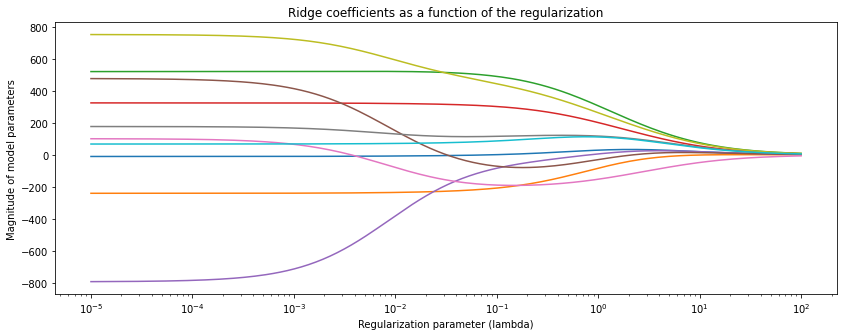

In [15]:
# based on https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

X, y = load_diabetes(return_X_y=True)

# create ridge coefficients
alphas = np.logspace(-5, 2,  )
ridge_coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

# plot ridge coefficients
plt.figure(figsize=(14, 5))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Regularization parameter (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

# Sparsity: Ridge vs. Lasso

The Ridge model does not produce sparse weights. Let's now compare it to a Lasso model.

Observe how the Lasso parameters become progressively smaller, until they reach exactly zero, and then they stay at zero.

(-133.00520290292727, 3673.000247757282, -869.357335763701, 828.4524952229654)

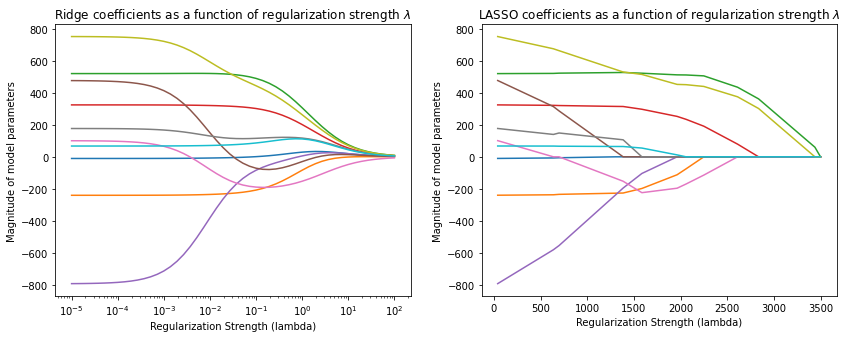

In [17]:
# Based on: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_diabetes
from sklearn.linear_model import lars_path

# create lasso coefficients    
X, y = load_diabetes(return_X_y=True)
_, _, lasso_coefs = lars_path(X, y, method='lasso')
xx = np.sum(np.abs(lasso_coefs.T), axis=1)

# plot ridge coefficients
plt.figure(figsize=(14, 5))
plt.subplot('121')    
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Regularization Strength (lambda)')
plt.ylabel('Magnitude of model parameters')
plt.title('Ridge coefficients as a function of regularization strength $\lambda$')
plt.axis('tight')

# plot lasso coefficients
plt.subplot('122') 
plt.plot(3500-xx, lasso_coefs.T)
ymin, ymax = plt.ylim()
plt.ylabel('Magnitude of model parameters')
plt.xlabel('Regularization Strength (lambda)')
plt.title('LASSO coefficients as a function of regularization strength $\lambda$')
plt.axis('tight')

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 6: Generative Models and Naive Bayes

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Text Classification

An interesting instance of a classification problem is classifying text.
* Includes a lot applied problems: spam filtering, fraud detection, medical record classification, etc.
* Inputs $x$ are sequences of words of an arbitrary length.
* The dimensionality of text inputs is usually very large, proportional to the size of the vocabulary.

# Bag of Words Representations

Perhaps the most widely used approach to representing text documents is called "bag of words".

We start by defining a vocabulary $V$ containing all the possible words we are interested in, e.g.:
$$ V = \{\text{church}, \text{doctor}, \text{fervently}, \text{purple}, \text{slow}, ...\} $$

A bag of words representation of a document $x$ is a function $\phi(x) \to \{0,1\}^{|V|}$ that outputs a feature vector
$$
\phi(x) = \left( 
\begin{array}{c}
0 \\
1 \\
0 \\
\vdots \\
0 \\
\vdots \\
\end{array}
\right)
\begin{array}{l}
\;\text{church} \\
\;\text{doctor} \\
\;\text{fervently} \\
\\
\;\text{purple} \\
\\
\end{array}
$$
of dimension $V$. The $j$-th component $\phi(x)_j$ equals $1$ if $x$ convains the $j$-th word in $V$ and $0$ otherwise.

# Classification Using BoW Features

Let's now have a look at the performance of classification over bag of words features.

Now that we have a feature representation $\phi(x)$, we can apply the classifier of our choice, such as logistic regression.

* Once text is featurized, any off-the-shelf supervised learning algorithm can be applied, but some work better than others, as we will see next.

# Review: Supervised Learning Models

A supervised learning model is a function
$$ f_\theta : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

Models have *parameters* $\theta \in \Theta$ living in a set $\Theta$.

For example, **logistic regression is a binary classification algorithm** which uses a model 
$$f_\theta : \mathcal{X} \to [0,1]$$ 
of the form
$$ f_\theta(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where $\sigma(z) = \frac{1}{1 + \exp(-z)}$ is the *sigmoid* or *logistic* function.

For example, our logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

In the logistic regression example, we optimize the following objective defined over a binary classification dataset  $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.
\begin{align*}
\ell(\theta) & = \frac{1}{n}\sum_{i=1}^n \log P_\theta (y^{(i)} \mid x^{(i)}) \\
& = \frac{1}{n}\sum_{i=1}^n {y^{(i)}} \cdot \log \sigma(\theta^\top x^{(i)}) + (1-y^{(i)}) \cdot \log (1-\sigma(\theta^\top x^{(i)})).
\end{align*}

This objective is also often called the log-loss, or cross-entropy.

# Discriminative Models

Logistic regression is an example of a *discriminative* machine learning model because 
* It directly transforms $x$ into a score for each class $y$ (e.g., via the formula $y=\sigma(\theta^\top x)$)
* It can be interpreted as defining a *conditional* probability $P_\theta(y|x)$

# Generative Models

Another approach to classification is to use *generative* models.

* A generative approach first builds a model of $x$ for each class:
$$ P_\theta(x | y=k) \; \text{for each class $k$}.$$
$P_\theta(x | y=k)$ *scores* each $x$ according to how well it matches class $k$.

* A class probability $P_\theta(y=k)$ encoding our prior beliefs
$$ P_\theta(y=k) \; \text{for each class $k$}.$$
These are often just the % of each class in the data.

In the context of spam classification, we would fit two models on a corpus of emails $x$ with spam/non-spam labels $y$:

\begin{align*}
P_\theta(x|y=\text{0}) && \text{and} && P_\theta(x|y=\text{1})
\end{align*}

as well as define priors $P_\theta(y=\text{0}), P_\theta(y=\text{1})$.

$P_\theta(x | y=1)$ *scores* each $x$ based on how much it looks like spam.

$P_\theta(x | y=0)$ *scores* each $x$ based on how much it looks like non-spam.

# Predictions From Generative Models

Given a new $x'$, we return the class that is the most likely to have generated it:
\begin{align*}
\arg \max_k P_\theta(y=k | x') & = \arg \max_k  \frac{P_\theta(x' | y=k) P_\theta(y=k)}{P_\theta(x')} \\
& = \arg \max_k P_\theta(x' | y=k) P_\theta(y=k),
\end{align*}
where we have applied Bayes' rule in the first line.

In the context of spam classification, given a new $x'$, we would compare the probabilities of both models:

\begin{align*}
P_\theta(x'|y=\text{0})P_\theta(y=\text{0}) && \text{vs.} && P_\theta(x'|y=\text{1})P_\theta(y=\text{1})
\end{align*}

We output the class that's more likely to have generated $x'$.

# Probabilistic Interpretations

A *generative* model defines $P_\theta(x|y)$ and $P_\theta(y)$, thus it also defines a distribution of the form $P_\theta(x,y)$.

\begin{align*}
\underbrace{P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{generative model} & \;\; & \underbrace{P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{discriminative model}
\end{align*}

**Discriminative models don't define any probability over the $x$'s. Generative models do.**

We can learn a generative model $P_\theta(x, y)$ by maximizing the *likelihood*:

$$ \max_\theta \frac{1}{n}\sum_{i=1}^n \log P_\theta({x}^{(i)}, y^{(i)}). $$

This says that we should choose parameters $\theta$ such that the model $P_\theta$ assigns a high probability to each training example $(x^{(i)}, y^{(i)})$ in the dataset $\mathcal{D}$.

# Generative vs. Discriminative Approaches

What are the pros and cons of generative and discirminative methods?

* If we only care about prediction, we don't need a model of $P(x)$. It's simpler to only model $P(y|x)$ (what we care about).
    * In practice, discriminative models are often be more accurate.

* If we care about other tasks (generation, dealing with missing values, etc.) or if we know the true model is generative, we want to use the generative approach.

More on this later!

# A Generative Model for Text Classification

In binary text classification, we fit two models on a labeled corpus:
\begin{align*}
P_\theta(x|y=\text{0}) && \text{and} && P_\theta(x|y=\text{1})
\end{align*}
We also define priors $P_\theta(y=\text{0}), P_\theta(y=\text{1})$.

Each model $P_\theta(x | y=k)$ *scores* $x$ based on how much it looks like class $k$.
The documents $x$ are in __bag-of-words__ representation.

How do we choose $P_\theta(x|y=k)$?

# Review: Categorical Distribution

A [Categorical](https://en.wikipedia.org/wiki/Categorical_distribution) distribution with parameters $\theta$ is a probability
over $K$ discrete outcomes $x \in \{1,2,...,K\}$:

$$
P_\theta(x = j) = \theta_j.
$$

When $K=2$ this is called the [Bernoulli](https://en.wikipedia.org/wiki/Bernoulli_distribution).

# First Attempt at a Generative Model

Note there is a finite number of $x$'s: each is a binary vector of size $d$.

A first solution is to assume that $P(x|y=k)$ is a categorical distribution that assigns a probability to each possible state of $x$:
$$
P(x|y=k) = P_k \left( 
\begin{array}{c}
0 \\
1 \\
0 \\
\vdots \\
0 
\end{array}
\right.
\left.
\begin{array}{l}
\;\text{church} \\
\;\text{doctor} \\
\;\text{fervently} \\
\vdots \\
\;\text{purple}
\end{array}
\right) = \theta_{xk} = 0.0012
$$
The $\theta_{xk}$ is the probability of $x$ under class $k$. We want to learn these.

# Problem: High Dimensionality

How many parameters does a Categorical model $P(x|y=k)$ have?

* If the dimensionality $d$ of $x$ is high (e.g., vocabulary has size 10,000), $x$ can take a huge number of values ($2^{10000}$ in our example)

* We need to specify $2^{d}-1$ parameters for the Categorical distribution.

For comparison, there are $\approx 10^{82}$ atoms in the universe.

# Naive Bayes: An Example

To deal with high-dimensional $x$, we choose a simpler model for $P_\theta(y|x)$:
1. We define a (Bernoulli) model with one parameter $\psi_{jk} \in [0,1]$ for the occurrence of each word $j$ in class $k$:
$$P_\theta(x_j = 1 \mid y=k) = \psi_{jk}$$
$\psi_{jk}$ is the probability that a document of class $k$ contains word $j$.

2. We define the model $P_\theta(x|y=k)$ for documents $x$ as the product of the occurrence probabilities of each of its words $x_j$:
$$ P_\theta(x|y=k) = \prod_{j=1}^d P_\theta(x_j \mid y=k) $$

How many parameters does this new model have?

* We have a distribution $P_\theta(x_j = 1 \mid y=k)$ for each word $j$ and each distribution has one parameter $\psi_{jk}$.

* The distribution $P_\theta(x|y=k) = \prod_{j=1}^d P_\theta(x_j \mid y=k)$ is the product of $d$ such one-parameter distributions.

* We have $K$ distributions of the form $P_\theta(x|y=k)$.

Thus, we only need $Kd$ parameters instead of $K(2^d-1)$!

# The Naive Bayes Assumption Machine Learning

The Naive Bayes assumption is a __general technique__ that can be used with any $d$-dimensional $x$. 
* We simplify the model for $x$ as:
$$ P(x|y) = \prod_{j=1}^d P(x_j \mid y) $$
* We choose a simple distribution family for $P(x_j \mid y)$.

This typcally makes the number of parameters linear instead of exponential in $d$.

# Is Naive Bayes a Good Assumption?

Naive Bayes assumes that words are uncorrelated, but in reality they are.
  * If spam email contains "bank", it probably contains "account"
  
As a result, the probabilities estimated by Naive Bayes can be over- under under-confident.

In practice, however, Naive Bayes is a very useful assumption that gives very good classification accuracy!

# Defining Prior Distributions for Our Model

We still need to define the distribution $P_\theta(y=k)$.
* This encodes our prior belief about $y$ before we see $x$.
* It can also be learned from data.

Since we have a small number of classes $K$, we may use a Categorical distribution with parameters $\vec\phi = (\phi_1,...,\phi_K)$ and learn $\vec\phi$ from data:

$$ P_\theta(y=k) = \phi_k.$$

# Bernoulli Naive Bayes Model

The *Bernoulli Naive Bayes* model $P_\theta(x,y)$ is defined for *binary data* $x \in \{0,1\}^d$ (e.g., bag-of-words documents).

The $\theta$ contains prior parameters $\vec\phi = (\phi_1,...,\phi_K)$ and $K$ sets of per-class parameters $\psi_k = (\psi_{1k},...,\psi_{dk})$.

The probability of the data $x$ for each class equals
$$P_\theta(x|y=k) = \prod_{j=1}^d P(x_j \mid y=k),$$
where each $P_\theta(x_j \mid y=k)$ is a $\text{Bernoullli}(\psi_{jk})$.

The probability over $y$ is Categorical:
$P_\theta(y=k) = \phi_k$.

Formally, we have:
\begin{align*}
P_\theta(y) & = \text{Categorical}(\phi_1,\phi_2,\ldots,\phi_K) \\
P_\theta(x_j=1|y=k) & = \text{Bernoullli}(\psi_{jk}) \\
P_\theta(x|y=k) & = \prod_{j=1}^d P_\theta(x_j|y=k)
\end{align*}
The parameters of the model are $\theta = (\phi_1,...,\phi_K, \psi_{11}, ...,\psi_{dK})$.
There are exactly $K(d+1)$ parameters.

# Algorithm: Bernoulli Naive Bayes

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Products of Bernoulli distributions, categorical priors
* __Objective function__: Log-likelihood.
* __Optimizer__: Closed form solution.

# Learning a Bernoulli Naive Bayes Model

Given a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)})\mid i=1,2,\ldots,n\}$, we want to optimize the log-likelihood $\ell(\theta) = \log L(\theta)$:
\begin{align*}
\ell & = \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)}) = \sum_{i=1}^n \sum_{j=1}^d \log P_\theta(x^{(i)}_j | y^{(i)}) + \sum_{i=1}^n \log P_\theta(y^{(i)}) \\
& = \sum_{k=1}^K \sum_{j=1}^d \underbrace{\sum_{i :y^{(i)} =k} \log P(x^{(i)}_j | y^{(i)} ; \psi_{jk})}_\text{all the terms that involve $\psi_{jk}$} + \underbrace{\sum_{i=1}^n \log P(y^{(i)} ; \vec \phi)}_\text{all the terms that involve $\vec \phi$}.
\end{align*}

In equality #2, we use Naive Bayes: $P_\theta(x,y)=P_\theta(y) \prod_{i=1}^d P(x_j|y)$; in the third one, we change the order of summation.

Each $\psi_{jk}$ for $k=1,2,\ldots,K$ is found in only the following terms:
$$ \max_{\psi_{jk}} \ell(\theta) = \max_{\psi_{jk}} \sum_{i :y^{(i)} =k} \log P(x^{(i)}_j | y^{(i)} ; \psi_{jk}). $$
Thus, optimization over $\psi_{jk}$ can be carried out independently of all the other parameters by just looking at these terms.

Similarly, optimizing for $\vec \phi = (\phi_1, \phi_2, \ldots, \phi_K)$ only involves a few terms:
$$ \max_{\vec \phi} \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)} ; \theta) = \max_{\vec\phi} \sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi). $$

# Learning the Parameters $\phi$

Let's first consider the optimization over $\vec \phi = (\phi_1, \phi_2, \ldots, \phi_K)$. 
$$ \max_{\vec \phi} \sum_{i=1}^n  \log P_\theta(y=y^{(i)} ; \vec \phi). $$
* We have $n$ datapoints, each having one of $K$ classes
* We want to learn the most likely class probabilities $\phi_k$ that generated this data

What is the maximum likelihood $\phi$ in this case?

Inuitively, the maximum likelihood class probabilities $\phi$ should just be the class proportions that we see in the data. 

Let's calculate this formally. Our objective $J(\vec \phi)$ equals
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi) = \sum_{i=1}^n  \log \left( \frac{\phi_{y^{(i)}}}{\sum_{k=1}^K \phi_k}\right) \\
& = \sum_{i=1}^n \log \phi_{y^{(i)}} - n \cdot \log \sum_{k=1}^K \phi_k \\ 
& = \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k - n \cdot \log \sum_{k=1}^K \phi_k
\end{align*}

Taking the derivative and setting it to zero, we obtain 
$$ \frac{\phi_k}{\sum_l \phi_l} = \frac{n_k}{n}$$
for each $k$, where $n_k = |\{i : y^{(i)} = k\}|$ is the number of training targets with class $k$.

Thus, the optimal $\phi_k$ is just the proportion of data points with class $k$ in the training set!

# Learning the Parameters $\psi_{jk}$

Next, let's look at the maximum likelihood term
$$ \arg\max_{\psi_{jk}} \sum_{i :y^{(i)} =k} \log P(x^{(i)}_j | y^{(i)} ; \psi_{jk}). $$
over the word parameters $\psi_{jk}$.

* Our dataset are all the inputs $x$ for which $y=k$.
* We seek  the probability $\psi_{jk}$ of a word $j$ being present in a $x$.

What is the maximum likelihood $\psi_{jk}$ in this case?

Each $\psi_{jk}$ is simply the proportion of documents in class $k$ that contain the word $j$.

We can maximize the likelihood exactly like we did for $\phi$ to obtain closed form solutions:
\begin{align*}
\psi_{jk} = \frac{n_{jk}}{n_k}.
\end{align*}
where $|\{i : x^{(i)}_j = 1 \text{ and } y^{(i)} = k\}|$ is the number of $x^{(i)}$ with label $k$ and a positive occurrence of word $j$.

# Querying the Model

How do we ask the model for predictions? As discussed earler, we can apply Bayes' rule:
$$\arg\max_y P_\theta(y|x) = \arg\max_y P_\theta(x|y)P(y).$$
Thus, we can estimate the probability of $x$ and under each $P_\theta(x|y=k)P(y=k)$ and choose the class that explains the data best.

# Advantages of Naive Bayes

Naive Bayes is a very important model in machine learning.

* Usually much easier to train: we have closed form solutions for the optimal parameters!
* Can deal with missing values, noisy inputs, and more!

On many classification tasks, Naive Bayes matches the state-of-the-art.

# Downsides of Naive Bayes

Fundamentally, the modeling assumptions of Naive Bayes are incorrect:
* May generate over- or under-confident predictions
* Lower performance when assumptions fail

# Review: Normal (Gaussian) Distribution

A [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) distribution $P_\theta(x) : \mathcal{X} \to [0,1]$ with parameters $\theta = (\mu, \Sigma)$
is a probability over a $d$-dimensional $x \in \mathbb{R}^d$

$$
P_\theta(x; \mu, \Sigma) = \frac{1}{\sqrt{(2 \pi)^d | \Sigma |}} \exp\left(-\frac{1}{2} (x - \mu)^\top \Sigma^{-1} (x-\mu) \right)
$$

In one dimension, this reduces to $\frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2} \right)$.

# Algorithm: Gaussian Discriminant Analysis (GDA): https://zhuanlan.zhihu.com/p/38269530 

* __Type__: Supervised learning (multi-class classification)
* __Model family__: Mixtures of Gaussians.
* __Objective function__: Log-likelihood.
* __Optimizer__: Closed form solution.

Let's use maximum likelihood to fit the Guassian Discriminant model. Note that model parameterss $\theta$ are the union of the parameters of each sub-model:
$$\theta = (\mu_1, \Sigma_1, \phi_1, \ldots, \mu_K, \Sigma_K, \phi_K).$$


Mathematically, the components of the model $P_\theta(x,y)$ are as follows.
\begin{align*}
P_\theta(y) & = \frac{\prod_{k=1}^K \phi_k^{\mathbb{I}\{y = y_k\}}}{\sum_{k=1}^k \phi_k} \\
P_\theta(x|y=k) & = \frac{1}{(2\pi)^{d/2}|\Sigma|^{1/2}} \exp(-\frac{1}{2}(x-\mu_k)^\top\Sigma_k^{-1}(x-\mu_k))
\end{align*}

# Optimizing the Log Likelihood

Given a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)})\mid i=1,2,\ldots,n\}$, we want to optimize the log-likelihood $\ell(\theta)$:
\begin{align*}
\ell(\theta) & = \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)}) = \sum_{i=1}^n \log P_\theta(x^{(i)} | y^{(i)}) + \sum_{i=1}^n \log P_\theta(y^{(i)}) \\
& = \sum_{k=1}^K  \underbrace{\sum_{i : y^{(i)} = k} \log P(x^{(i)} | y^{(i)} ; \mu_k, \Sigma_k)}_\text{all the terms that involve $\mu_k, \Sigma_k$} + \underbrace{\sum_{i=1}^n \log P(y^{(i)} ; \vec \phi)}_\text{all the terms that involve $\vec \phi$}.
\end{align*}

In equality #2, we use the fact that $P_\theta(x,y)=P_\theta(y) P_\theta(x|y)$; in the third one, we change the order of summation.

Each $\mu_k, \Sigma_k$ for $k=1,2,\ldots,K$ is found in only the following terms:
\begin{align*}
\max_{\mu_k, \Sigma_k} \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)})
& = \max_{\mu_k, \Sigma_k} \sum_{l=1}^K  \sum_{i : y^{(i)} = l} \log P_\theta(x^{(i)} | y^{(i)} ; \mu_l, \Sigma_l) \\
& = \max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log P_\theta(x^{(i)} | y^{(i)} ; \mu_k, \Sigma_k).
\end{align*}
Thus, optimization over $\mu_k, \Sigma_k$ can be carried out independently of all the other parameters by just looking at these terms.

Similarly, optimizing for $\vec \phi = (\phi_1, \phi_2, \ldots, \phi_K)$ only involves a few terms:
$$ \max_{\vec \phi} \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)} ; \theta) = \max_{\vec\phi} \
\sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi). $$

# Learning the Parameters $\phi$

Let's first consider the optimization over $\vec \phi = (\phi_1, \phi_2, \ldots, \phi_K)$. 
$$ \max_{\vec \phi} \sum_{i=1}^n  \log P_\theta(y=y^{(i)} ; \vec \phi). $$
* We have $n$ datapoints. Each point has a label $k\in\{1,2,...,K\}$.
* Our model is a categorical and assigns a probability $\phi_k$ to each outcome $k\in\{1,2,...,K\}$.
* We want to infer $\phi_k$ assuming our dataset is sampled from the model.

What are the maximum likelihood $\phi_k$ that are most likely to have generated our data?

Inuitively, the maximum likelihood class probabilities $\phi$ should just be the class proportions that we see in the data. 

Let's calculate this formally. Our objective $J(\vec \phi)$ equals
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi) \\
& = \sum_{i=1}^n \log \phi_{y^{(i)}} - n \cdot \log \sum_{k=1}^K \phi_k \\ 
& = \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k - n \cdot \log \sum_{k=1}^K \phi_k
\end{align*}

Taking the derivative and setting it to zero, we obtain 
$$ \frac{\phi_k}{\sum_l \phi_l} = \frac{n_k}{n}$$
for each $k$, where $n_k = |\{i : y^{(i)} = k\}|$ is the number of training targets with class $k$.

Thus, the optimal $\phi_k$ is just the proportion of data points with class $k$ in the training set!

# Learning the Parameters $\mu_k, \Sigma_k$

Next, let's look at the maximum likelihood term
$$\max_{\mu_k, \Sigma_k} \sum_{i : y^{(i)} = k} \log \mathcal{N}(x^{(i)} | \mu_k, \Sigma_k)$$
over the Gaussian parameters $\mu_k, \Sigma_k$.

* Our dataset are all the points $x$ for which $y=k$.
* We want to learn the mean and variance $\mu_k, \Sigma_k$ of a normal distribution that generates this data.

What is the maximum likelihood $\mu_k, \Sigma_k$ in this case?

Computing the derivative and setting it to zero, we obtain closed form solutions:
\begin{align*}
\mu_k & = \frac{\sum_{i: y^{(i)} = k} x^{(i)}}{n_k} \\
\Sigma_k & = \frac{\sum_{i: y^{(i)} = k} (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k} \\
\end{align*}
**These are just the empirical means and covariances of each class.**

# Querying the Model

How do we ask the model for predictions? As discussed earler, we can apply Bayes' rule:
$$\arg\max_y P_\theta(y|x) = \arg\max_y P_\theta(x|y)P(y).$$
Thus, we can estimate the probability of $x$ and under each $P_\theta(x|y=k)P(y=k)$ and choose the class that explains the data best.

# Special Cases of GDA

Many important generative algorithms are special cases of Gaussian Discriminative Analysis
* Linear discriminant analysis (LDA): all the covariance matrices $\Sigma_k$ take the same value.
* Gaussian Naive Bayes: all the covariance matrices $\Sigma_k$ are diagonal.
* Quadratic discriminant analysis (QDA): another term for GDA.

# Generative vs. Discriminative Approaches

Pros of discriminative models:
* Often more accurate because they make fewer modeling assumptions.

Pros of generative models:
* Can do more than just prediction: generation, fill-in missing features, etc.
* Can include extra prior knowledge; if prior knowledge is correct, model will be more accurate.
* Often have closed-form solutions, hence are faster to train.

# Linear Discriminant Analysis

When the covariances $\Sigma_k$ in GDA are equal, we have an algorithm called Linear Discriminant Analysis or LDA.

The probability of the data $x$ for each class is a multivariate Gaussian with the same covariance $\Sigma$.
$$P_\theta(x|y=k) = \mathcal{N}(x ; \mu_k, \Sigma).$$

The probability over $y$ is Categorical:
$P_\theta(y=k) = \phi_k$.

Linear Discriminant Analysis outputs decision boundaries that are linear, just like Logistic/Softmax Regression.

Softmax or Logistic regression also produce linear boundaries. In fact, both types of algorithms make use of the same model class.

What is their difference then?

# What Is the LDA Model Class?

We can derive a formula for $P_\theta(y|x)$ in a Bernoulli Naive Bayes or LDA model when $K=2$:
$$ P_\theta(y|x) = \frac{P_\theta(x|y)P_\theta(y)}{\sum_{y'\in \mathcal{Y}}P_\theta(x|y')P_\theta(y')} = \frac{1}{1+\exp(-\gamma^\top x)} $$
for some set of parameters $\gamma$ (whose expression can be derived from $\theta$). 

This is the same form as Logistic Regression! Does it mean that the two sets of algorithms are equivalent? 

No! They assume the same model class $\mathcal{M}$, **they use a different objective $J$ to select a model in $\mathcal{M}$.**

# Discriminative Approaches

Discriminative algorithms are deservingly very popular.
* Most state-of-the-art algorithms for classification are discriminative (including neural nets, boosting, SVMs, etc.)
* They are often more accurate because they make fewer modeling assumptions.

# Other Useful Features of Generative Models

Generative models can also do things that discriminative models can't do.
* __Generation__: we can sample $x \sim p(x|y)$ to generate new data (images, audio).
* __Missing value imputation__: if $x_j$ is missing, we infer it using $p(x|y)$.
* __Outlier detection__: we may detect via $p(x')$ if $x'$ is an outlier.
* __Scalability__: Simple formulas for maximum likelihood parameters.

# Generative Approaches

But generative algorithms also have many advantages:
* Can do more than just prediction: generation, fill-in missing features, etc.
* Can include extra prior knowledge; if prior knowledge is correct, model will be more accurate.
* Often have closed-form solutions, hence are faster to train.

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 8: Unsupervised Learning

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Unsupervised Learning

**We have a dataset *without* labels.** Our goal is to learn something interesting about the structure of the data:
* Clusters hidden in the dataset.
* Outliers: particularly unusual and/or interesting datapoints.
* Useful signal hidden in noise, e.g. human speech over a noisy phone.

#  Unsupervised Dataset: Notation

We define  of size $n$ a dataset for unsupervised learning as
$$\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$$

Each $x^{(i)} \in \mathbb{R}^d$ denotes an input, a vector of $d$ attributes or features.

# Model: Notation

We'll say that a model is a function
$$ f : \mathcal{X} \to \mathcal{S} $$
that maps inputs $x \in \mathcal{X}$ to some notion of structure $s \in \mathcal{S}$.

Structure can have many definitions (clusters, low-dimensional representations, etc.), and we will see many examples.

Often, models have *parameters* $\theta \in \Theta$ living in a set $\Theta$. We will then write the model as
$$ f_\theta : \mathcal{X} \to \mathcal{S} $$
to denote that it's parametrized by $\theta$.

# Model Class: Notation

Formally, the model class is a set 
$$\mathcal{M} \subseteq \{f \mid f : \mathcal{X} \to \mathcal{S} \}$$
of possible models that map input features to structural elements.

When the models $f_\theta$ are paremetrized by *parameters* $\theta \in \Theta$ living in some set $\Theta$. Thus we can also write
$$\mathcal{M} = \{f_\theta \mid f : \mathcal{X} \to \mathcal{S}; \; \theta \in \Theta \}.$$

# Objective: Notation

We again define an *objective function* (also called a *loss function*)
$$J(f) : \mathcal{M} \to [0, \infty), $$
which describes the extent to which $f$ "fits" the data $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$.

When $f$ is parametrized by $\theta \in \Theta$, the objective becomes a function $J(\theta) : \Theta \to [0, \infty).$

# Optimizer: Notation

An optimizer finds a model $f \in \mathcal{M}$ with the smallest value of the objective $J$.
\begin{align*}
\min_{f \in \mathcal{M}} J(f)
\end{align*}

Intuitively, this is the function that bests "fits" the data on the training dataset.

When $f$ is parametrized by $\theta \in \Theta$, the optimizer minimizes a function $J(\theta)$ over all $\theta \in \Theta$.

# The $K$-Means Model

We can use this dataset as input to a popular unsupervised learning algorithm, __$K$-means__.

* The algorithm seeks to find $K$ hidden clusters in the data.
* Each cluster is characterized by its centroid (its mean).
* The clusters reveal interesting structure in the data.

The parameters $\theta$ of the model are $K$ *centroids* $c_1, c_2, \ldots c_K \in \mathcal{X}$. The class of $x$ is $k$ if $c_k$ is the closest centroid to $x$.

We can think of the model returned by $K$-Means as a function
$$f_\theta : \mathcal{X} \to \mathcal{S}$$
that assigns each input $x$ to a cluster $s \in \mathcal{S} = \{1,2,\ldots,K\}$.

# K-Means at a High Level

At a high level, $K$-means performs the following steps. 

Starting from random clusters, we repeat until convergence:
1. Set each centroid to be the center of the its cluster.
2. Update each cluster: assign each point to its closest centroid.

# The $K$-Means Objective

How do we determine whether $f_\theta$ is a good clustering of the dataset $\mathcal{D}$?

We seek centroids $c_k$ such that the distance between the points and their closest centroid is minimized:
$$J(\theta) = \sum_{i=1}^n || x^{(i)} - \text{centroid}(f_\theta(x^{(i)})) ||,$$
where $\text{centroid}(k) = c_k$ denotes the centroid for cluster $k$.

# The $K$-Means Optimizer

We can optimize this in a two stop process, starting with an initial random cluster assignment $f(x)$.

Repeat until convergence:
1. Set each $c_k$ to be the center of the its cluster $\{x^{(i)} \mid f(x^{(i)}) = k\}$.
2. Update clustering $f(x)$ such that $x^{(i)}$ is in the cluster of its closest centroid.

$K$-Means has a number of limitations:
* Clustering can get stuck in local minima
* Measuring clustering quality is hard and relies on heuristics
* Cluster assignment is binary and doesn't estimate confidence

# Review: Generalization

In machine learning, __generalization__ is the property of predictive models to achieve good performance on new, heldout data that is distinct from the training set.

How does generalization apply to unsupervised learning?

# Generalization in Unsupervised Learning

We can think of the data distribution as being the sum of two distinct components $\mathbb{P} = F + E$
1. A signal component $F$ (hidden clusters, speech, low-dimensional data space, etc.)
2. A random noise component $E$

A machine learning model generalizes if it fits the true signal $F$; it overfits if it learns the noise $E$.

# Underfitting in Unsupervised Learning

Underfitting happens when we are not able to fully learn the signal hidden in the data.

In the context of $K$-Means, this means not capturing all the clusters in the data.

# Overfitting in Unsupervised Learning

Overfitting happens when we fit the noise, but not the signal.

In our example, this means fitting small, local noise clusters rather than the true global clusters.

# The Elbow Method: https://www.biaodianfu.com/k-means-choose-k.html

The Elbow method is a way of tuning hyper-parameters in unsupervised learning.
* We plot the objective function as a function of the hyper-parameter $K$.
* The "elbow" of the curve happens when its rate of decrease substantially slows down.
* The "elbow' is a good guess for the hyperparameter.

# Detecting Overfitting and Underfitting

In unsupervised learning, overfitting and underfitting are more difficult to quantify than in supervised learning.
* Performance may depend on our intuition and require human evaluation
* If we know the true labels, we can measure the accuracy of the clustering

If our model is probabilistic, we can detect overfitting without labels by comparing the log-likelihood between the training set and a holdout set (next lecture!).

# Reducing Overfitting

There are multiple ways to control for overfitting:
1. Reduce model complexity (e.g., reduce $K$ in $K$-Means)
2. Penalize complexity in objective (e.g., penalize large $K$)
3. **Use a probabilistic model and regularize it.**

# Summary

The concept of generalization applies to both supervised and unsupervised learning.
* In supervised learning, it is easier to quantify via the accuracy.
* In unsupervised learning, we may not be able to easily detect overfitting, but it still happens.

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 9: Density Estimation

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Why Use Probabilistic Models?

There are many tasks that we can solve with a good model $P_\theta$.
1. Generation: sample new objects from $P_\theta$, such as images.
2. Structure learning: find interesting structure in $P_\text{data}$
3. Density estimation: approximate $P_\theta \approx P_\text{data}$ and use it to solve any downstream task (generation, clustering, outlier detection, etc.).

We are going to be interested in the latter.

# Density Estimation

The problem of density estimation is to approximate the data distribution $P_\text{data}$ with the model $P$.
$$ P \approx P_\text{data}. $$

It's also a general learning task. We can solve many downstream tasks using a good model $P$:
* Outlier and novelty detection
* Generating new samples $x$
* Visualizing and understanding the structure of $P_\text{data}$

# Histogram Density Estimation

Perhaps the simplest approach to density estimation is by forming a histogram.

A histogram partitions the input space $x$ into a $d$-dimensional grid and counts the number of points in each cell.

# Limitations of Histograms

Histogram-based methods have a number of shortcomings.
* The number of grid cells increases exponentially with dimension $d$.
* The histogram is not "smooth".
* The shape of the histogram depends on the bin positions.

We will now try to address the last two limitations.

# Algorithm: Kernel Density Estimation

* __Type__: Unsupervised learning (density estimation).
* __Model family__: Non-parametric. Sum of $n$ kernels.
* __Objective function__: Log-likelihood to choose optimal bandwidth.
* __Optimizer__: Grid search.

# Kernel Density Estimation: Idea

Kernel density estimation (KDE) is a different approach to histogram estimation.
* A histogram has $b$ bins of width $\delta$ at fixed positions.
* KDE effectively places a bin of with $\delta$ at each $x \in \mathcal{X}$.
* To obtain $P(x)$, we count the % of points that fall in the bin centered at $x$.

# Tophat Kernel Density Estimation

The simplest form of this strategy (Tophat KDE) assumes a model of the form
$$P_\delta(x) = \frac{N(x; \delta)}{n},$$
where
$$ N(x; \delta) = |\{x^{(i)} : ||x^{(i)} - x || \leq \delta/2\}|, $$
is the number of points that are within a bin of with $\delta$ centered at $x$.

The above algorithm still has the problem of producing a density estimate that is not smooth.

We are going to resolve this by replacing histogram counts with weighted averages.

# Kernels

A *kernel function* $K : \mathcal{X} \times \mathcal{X} \to [0, \infty]$ maps pairs of vectors $x, z \in \mathcal{X}$ to a real-valued score $K(x,z)$.

* A kernel represents the similarity between $x$ and $z$.
* We will see many ways of defining "similarity"; they will all fit the framework that follows.

# Kernel Density Estimation

A kernelized density model $P$ takes the form:
$$P(x) \propto \sum_{i=1}^n K(x, x^{(i)}).$$
This can be interpreted in several ways:
* We count the number of points "near" $x$, but each $x^{(i)}$ has a weight $K(x, x^{(i)})$ that depends on similarity between $x, x^{(i)}$.
* We place a "micro-density" $K(x, x^{(i)})$ at each $x^{(i)}$; the final density $P(x)$ is their sum.

# Types of Kernels

We have seen several types of kernels in the context of support vector machines.

There are additional kernels that are popular for density estimation.

The following kernels are available in `scikit-learn`.
* Gaussian kernel $K(x,z; \delta) \propto \exp(-||x-z||^2/2\delta^2)$
* Tophat kernel $K(x,z; \delta) = 1 \text{ if } ||x-z|| \leq \delta/2$ else $0$.
* Epanechnikov kernel $K(x,z; \delta) \propto 1 - ||x-z||^2/\delta^2$
* Exponential kernel $K(x,z; \delta) \propto \exp(-||x-z||/\delta)$
* Linear kernel $K(x,z; \delta) \propto (1 - ||x-z||/\delta)^+$

# KDE in Higher Dimensions

In priciple, kernel density estimation also works in higher dimensions.

However, the number of datapoints needed for a good fit incrases expoentially with the dimension, which limits the applications of this model in high dimensions.

# Choosing Hyperparameters

Each kernel has a notion of "bandwidth" $\delta$. This is a hyperparameter that controls the "smoothness" of the fit.
* We can choose it using inspection or heuristics like we did for $K$ in $K$-Means.
* Because we have a probabilistic model, we can also estimate likelihood on a holdout dataset (more on this later!)

# Pros and Cons of KDE

Pros:
* Can approximate any data distribution arbtrarily well.

Cons:
* Need to store entire dataset to make queries, which is computationally prohibitive.
* Number of data needed scale exponentially with dimension ("curse of dimensionality").

# Algorithm: K-Nearest Neighbors

* __Type__: Supervised learning (regression and classification)
* __Model family__: Consensus over $K$ training instances.
* __Objective function__: Euclidean, Minkowski, Hamming, etc.
* __Optimizer__: Non at training. Nearest neighbor search at inference using specialized search algorithms (Hashing, KD-trees).
* __Probabilistic interpretation__: Directly approximating the density $P_\text{data}(y|x)$.

# A Simple Classification Algorithm: Nearest Neighbors

Suppose we are given a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$. At inference time, we receive a query point $x'$ and we want to predict its label $y'$.

A really simple but suprisingly effective way of returning $y'$ is the *nearest neighbors* approach.
* Given a query datapoint $x'$, find the training example $(x, y)$ in $\mathcal{D}$ that's closest to $x'$, in the sense that $x$ is "nearest" to $x'$
* Return $y$, the label of the "nearest neighbor" $x$.

# Choosing a Distance Function

How do we select the point $x$ that is the closest to the query point $x'$? There are many options:

* The Euclidean distance $|| x - x' ||_2 = \sqrt{\sum_{j=1}^d |x_j - x'_j|^2)}$ is a popular choice.

* The Minkowski distance $|| x - x' ||_p = (\sum_{j=1}^d |x_j - x'_j|^p)^{1/p}$ generalizes the Euclidean, L1 and other distances.

# K-Nearest Neighbors

Intuitively, we expect the true decision boundary to be smooth. Therefore, we average $K$ nearest neighbors at a query point.

* Given a query datapoint $x'$, find the $K$ training examples $\mathcal{N} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(K)}, y^{(K)})\} \subseteq D$ that are closest to $x'$.
* Return $y_\mathcal{N}$, the consensus label of the neighborhood $\mathcal{N}$.

The consesus $y_\mathcal{N}$ can be determined by voting, weighted average, etc.

# KNN Estimates Data Distribution

Suppose that the output $y'$ of KNN is the average target in the neighborhood $\mathcal{N}(x')$ around the query $x'$.
Observe that we can write:
$$y' = \frac{1}{K} \sum_{(x, y) \in \mathcal{N}(x')} y \approx \mathbb{E}[y \mid x'].$$

* When $x \approx x'$ and when $\mathbb{P}$ is reasonably smooth, each $y$ for $(x,y) \in \mathcal{N}(x')$ is approximately a sample from $\mathbb{P}(y\mid x')$ (since $\mathbb{P}$ doesn't change much around $x'$, $\mathbb{P}(y\mid x') \approx \mathbb{P}(y\mid x)$).

* Thus $y'$ is essentially a Monte Carlo estimate of $\mathbb{E}[y \mid x']$ (the average of $K$ samples from $\mathbb{P}(y\mid x')$).

# Non-Parametric Models

Nearest neighbors is an example of a *non-parametric* model. Parametric vs. non-parametric are is a key distinguishing characteristic for machine learning models.

A parametric model $f_\theta(x) : \mathcal{X} \times \Theta \to \mathcal{Y}$ is defined by a finite set of parameters $\theta \in \Theta$ whose dimensionality is constant with respect to the dataset. Linear models of the form
$$ f_\theta(x) = \theta^\top x $$
are an example of a parametric model.

In a non-parametric model, the function $f$ uses the entire training dataset (or a post-proccessed version of it) to make predictions, as in $K$-Nearest Neighbors. 

In other words, the complexity of the model increases with dataset size.

Non-parametric models have the advantage of not loosing any information at training time.

However, they are also computationally less tractable and may easily overfit the training set.

# Pros and Cons of KNN

Pros:
* Can approximate any data distribution arbtrarily well.

Cons:
* Need to store entire dataset to make queries, which is computationally prohibitive.
* Number of data needed scale exponentially with dimension ("curse of dimensionality").

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 10: Clustering

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Gaussian Mixture Models

Gaussian mixtures define a model of the form:
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* $z \in \mathcal{Z} = \{1,2,\ldots,K\}$ is discrete and follows a categorical distribution $P_\theta(z=k) = \phi_k$.
* $x \in \mathbb{R}$ is continuous; conditioned on $z=k$, it follows a Normal distribution $P_\theta(x | z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The parameters $\theta$ are the $\mu_k, \Sigma_k, \phi_k$ for all $k=1,2,\ldots,K$.

# Gaussian Mixtures for Clustering

GMMs are useful for supervised *and* unsupervised learning (clustering):
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* This model postulates that our observed data is comprised of  $K$ clusters with proportions specified by $\phi_1,\phi_2, \ldots, \phi_K$
* The points within each cluster follow a Normal distribution
* Each point belongs to the cluster most likely to have generated it (according to $P_\theta(x|z=k)P_\theta(z=k)$)

Intuitively, a GMM represents well the two clusters in the geyser dataset:

Raw data | Single Gaussian | Mixture of Gaussians
--|--|---
<img width=90% src="img/oldfaithful_v2.png"> | <img width=90% src="img/oldfSingle_v2.png"> | <img width=90% src="img/oldfMOG_v2.png">

# Maximum Marginal Likelihood Learning

Maximum marginal (log-)likelihood is a way of learning any proabilistic model on an unsupervised dataset $\mathcal{D}$ by maximizing:
$$
\frac{1}{n}\sum_{i=1}^n \log P_\theta({x}^{(i)}) = \frac{1}{n}\sum_{i=1}^n \log \left(\sum_{z \in \mathcal{Z}} P_\theta({x}^{(i)}, z)\right).
$$

* This asks $P_\theta$ to assign a high probability to the training data in $\mathcal{D}$. 
* However, we need to use $P(x) = \sum_{z \in \mathcal{Z}} P(x,z)$ to compute this probability because $z$ is not observed.

# Optimizing Marginal Likelihood

How do we optimize the marginal likelihood objective?
$$\max_\theta \frac{1}{n}\sum_{i=1}^n \log \left(\sum_{z \in \mathcal{Z}} P_\theta({x}^{(i)}, z)\right)$$

* Note that we can't flip the sum and the log!
* Because of that, our closed-form solutions don't apply
* In fact, the objective now has many local minima!

Optimizing the likelihood of mixture models is hard. 

A Gaussian has a single maximum, but a mixture has many and its objective is non-convex (hard to optimize).

<center><img width=50% src="img/mogdensity1d_v2.png"></center>

# Recovering Clusters from GMMs

Given a trained model $P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$, we can look at the *posterior* probability
$$P_\theta(z = k\mid x) = \frac{P_\theta(z=k, x)}{P_\theta(x)} = \frac{P_\theta(x | z=k) P_\theta(z=k)}{\sum_{l=1}^K P_\theta(x | z=l) P_\theta(z=l)}$$
of a point $x$ belonging to class $k$.

* The posterior defines a "soft" assignment of $x$ to each class.
* This is in contrast to the hard assignments from $K$-Means.

* Unlike in supervised learning, cluster assignments are latent.
* Hence, there is not a closed form solution for $\theta$. 
* We will see specialized algorithm for this task.

# Expectation Maximization: Intuition

Expecation maximization (EM) is an algorithm for maximizing marginal log-likelihood 
$$\max_\theta \sum_{x^{(i)}\in \mathcal{D}} \log \left( \sum_{z \in \mathcal{Z}}P_\theta(x^{(i)}, z) \right)$$
that can also be used to learn Gaussian mixtures.

We want to optimize the marginal log-likelihood
$$\max_\theta \sum_{x^{(i)}\in \mathcal{D}} \log \left( \sum_{z \in \mathcal{Z}}P_\theta(x^{(i)}, z) \right).$$
* If we know the true $z^{(i)}$ for each $x^{(i)}$, we maximize
$$\max_\theta \sum_{x^{(i)}, z^{(i)}\in \mathcal{D}} \log \left( P_\theta(x^{(i)}, z^{(i)}) \right).$$
and it's easy to find the best $\theta$ (use solution for supervised learning).
* If we know $\theta$, we can estimate the cluster assignments $z^{(i)}$ for each $i$ by computing $P_\theta(z | x^{(i)})$.

Expectation maximization alternates between these two steps.

1. (__E-Step__) Given an estimate $\theta_t$ of the weights, compute $P_\theta(z | x^{(i)})$.
and use it to “hallucinate” expected cluster assignments $z^{(i)}$.
2. (__M-Step__) Find a new $\theta_{t+1}$ that maximizes the marginal log-likelihood by optimizing $P_\theta(x^{(i)}, z^{(i)})$ given the $z^{(i)}$ from step 1.

This process increases the marginal likelihood at each step and eventually converges.

# Expectation Maximization: Definition

Formally, EM learns the parameters $\theta$ of a latent-variable model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute new weights $\theta_{t+1}$ as
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)})
\end{align*}

Since assignments $P_{\theta_t}(z|x^{(i)})$ are "soft", M-step involves an expectation.

# Expectation Maximization: Definition

Formally, EM learns the parameters $\theta$ of a latent-variable model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute new weights $\theta_{t+1}$ as
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)}) \\
& = \arg\max_{\theta} \sum_{i=1}^n \sum_{k=1}^K P_{\theta_t}(z=k|x^{(i)}) \log P_{\theta}(x^{(i)}, z=k)
\end{align*}

# Understanding the E-Step

Intuitively, we hallucinate $z^{(i)}$ in the E-Step. 

In practice, the $P_{\theta_t}(z|x^{(i)})$ define "soft" assignments, and we compute a vector of class probabilities for each $x^{(i)}$.
<!-- * The $P_{\theta_t}(z|x^{(i)})$ define "soft" assignments, and we compute a vector of class probabilities for each $x^{(i)}$.
* We compute an expected values over $z^{(i)}$ instead of hallucinating one value. -->

# Understanding the M-Step

Since class assignments from E-step are probabilistic, we maximize an expectation:
\begin{align*}
\theta_{t+1} & = \arg\max_{\theta} \sum_{i=1}^n \mathbb{E}_{z^{(i)} \sim P_{\theta_t}(z|x^{(i)})} \log P_{\theta}(x^{(i)}, z^{(i)}) \\
& = \arg\max_{\theta} \sum_{i=1}^n \sum_{k=1}^K P_{\theta_t}(z=k|x^{(i)}) \log P_{\theta}(x^{(i)}, z=k)
\end{align*}
For many interesting models, this is tractable.

# Pros and Cons of EM

EM is a very important optimization algorithm in machine learning.
* It is easy to implement and is guaranteed to converge.
* It works in a lot of imporant ML models.

Its limitations include:
* It can get stuck in local optima.
* We may not be able to compute $P_{\theta_t}(z|x^{(i)})$ in every model.

# Deriving the E-Step

In the E-step, we compute the posterior for each data point $x$ as follows
 $$P_\theta(z = k\mid x) = \frac{P_\theta(z=k, x)}{P_\theta(x)} = \frac{P_\theta(x | z=k) P_\theta(z=k)}{\sum_{l=1}^K P_\theta(x | z=l) P_\theta(z=l)}$$
$P_\theta(z\mid x)$ defines a vector of probabilities that $x$ originates from component $k$ given the current set of parameters $\theta$

# Deriving the M-Step

At the M-step, we optimize the expected log-likelihood of our model.

\begin{align*}
&\max_\theta \sum_{x \in D} \mathbb{E}_{z \sim P_{\theta_t}(z|x)} \log P_\theta(x,z) = \\
& \max_\theta \left( \sum_{k=1}^K \sum_{x \in D} P_{\theta_t}(z_k|x) \log P_\theta(x|z_k) + \sum_{k=1}^K \sum_{x \in D} P_{\theta_t}(z_k|x) \log P_\theta(z_k) \right)
\end{align*}

As in supervised learning, we can optimize the two terms above separately.

We will start with $P_\theta(x\mid z=k) = \mathcal{N}(x; \mu_k, \Sigma_k)$. We have to find $\mu_k, \Sigma_k$ that optimize
$$
\max_\theta \sum_{x^{(i)} \in D} P(z=k|x^{(i)}) \log P_\theta(x^{(i)}|z=k)
$$
Note that this corresponds to fitting a Gaussian to a dataset whose elements $x^{(i)}$ each have a weight $P(z=k|x^{(i)})$.

Similarly to how we did this the supervised regime, we compute the derivative, set it to zero, and obtain closed form solutions:
\begin{align*}
\mu_k & = \frac{\sum_{i=1}^n P(z=k|x^{(i)}) x^{(i)}}{n_k} \\
\Sigma_k & = \frac{\sum_{i=1}^n P(z=k|x^{(i)}) (x^{(i)} - \mu_k)(x^{(i)} - \mu_k)^\top}{n_k} \\
n_k & = \sum_{i=1}^n P(z=k|x^{(i)}) \\
\end{align*}
Intuitively, the optimal mean and covariance are the emprical mean and convaraince of the dataset $\mathcal{D}$ when each element $x^{(i)}$ has a weight $P(z=k|x^{(i)})$.

Similarly, we can show that the class priors are
\begin{align*}
\phi_k & = \frac{n_k}{n} \\
n_k & = \sum_{i=1}^n P(z=k|x^{(i)})
\end{align*}

# EM in Gaussian Mixture Models

EM learns the parameters $\theta$ of a Gaussian mixture model $P_\theta(x,z)$ over a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ as follows.

For $t=0,1,2,\ldots$, repeat until convergence:
1. (__E-Step__) For each $x^{(i)} \in \mathcal{D}$ compute $P_{\theta_t}(z|x^{(i)})$
2. (__M-Step__) Compute parameters $\mu_k, \Sigma_k, \phi_k$ using the above formulas

# Measuring Generalization Using Log-Likelihood

Probabilistic unsupervised models optimize an objective that can be used to detect overfitting and underfitting by comparing performance between training and holdout sets.

Below, we visualize the performance (measured via negative log-likelihood) on training and holdout sets as $K$ increases.
* Generalization is important for supervised and unsupervised learning.
* A probabilistic model can detect overfitting by comparing the likelihood of training data vs. that of holdout data.
* We can reduce overfitting by making the model less expressive.

<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 11: Dimensionality Reduction

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Dimensionality Reduction:  Examples

Consider a dataset $\mathcal{D} = \{x^{(i)} \mid i = 1,2,...,n\}$ of motorcylces, characterized by a set of attributes.
* Attributes include size, color, maximum speed, etc.
* Suppose that two attributes are closely correlated: e.g., $x^{(i)}_j$ is the speed in `mph` and $x^{(i)}_k$ is the speed in `km/h`.
* The real dimensionality of the data is $d-1$!

We would like to automatically identify the right data dimensionality.

# Dimensionality Reduction

More generally, a dimensionality reduction algorithm learns from data an unsupervised model
$$f_\theta : \mathcal{X} \to \mathcal{Z},$$
where $\mathcal{Z}$ is a low-dimensional representation of the data.

For each input $x^{(i)}$, $f_\theta$ computes a low-dimensional representation $z^{(i)}$.

# Linear Dimensionality Reduction

Suppose $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Z} = \mathbb{R}^p$ for some $p < d$. The transformation 
$$f_\theta : \mathcal{X} \to \mathcal{Z}$$
is a linear function with parameters $\theta = W \in \mathbb{R}^{d \times p}$:
$$ z = f_\theta(x) = W^\top \cdot x. $$
The latent dimension $z$ is obtained from $x$ via a matrix $W$.

# Algorithm: Principal Component Analysis

* __Type__: Unsupervised learning (dimensionality reduction)
* __Model family__: Linear projection $W^\top z$ of low-dimensional $z$
* __Objective function__: Reconstruction error or variance maximization
* __Optimizer__: Matrix eigendecomposition

# Principal Components Model

Principal component analysis (PCA) assumes that 
* Datapoints $x \in \mathbb{R}^{d}$ live close to a low-dimensional subspace $\mathcal{Z} = \mathbb{R}^p$ of dimension $p<d$
* The subspace $\mathcal{Z} = \mathbb{R}^p$ is spanned by a set of orthonormal vectors $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$
* The data $x$ are approximated by a linear combination $\tilde x$ of the $w^{(k)}$
$$ x \approx \tilde x = \sum_{k=1}^p w^{(k)} z_k = W z $$
for some $z \in \mathcal{X}$ that are the coordinates of $\tilde x$ in the basis $W$.

In this example, the data lives in a lower-dimensional 2D plane within a 3D space (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=50% src="img/pca_example_plane.png"></center>

The model for PCA is a function $f_\theta$ of the form
$$ z = f_\theta(x) = W^\top x, $$
where $\theta = W$ and $W$ is a $d \times p$ matrix of $p$ orthonormal column vectors denoted as $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$.

This model enables performing two tasks:
* __Encoding__: $z = W^\top x$, finding the low-dimensional form of input $x$
* __Decoding__: $\tilde x = W  z$, converting a low-dimensional $z$ to a high-dimensional representation $x$

# PCA Objective: Reconstruction

How do we find a good subpace $\mathcal{Z}$ as defined by a set of orthonormal vectors $W$?

A natural objective is to minimize the reconstruction error
$$J_1(W) = \sum_{i=1}^n \| x^{(i)} - \tilde x^{(i)} \|_2^2 =\sum_{i=1}^n \| x^{(i)} - W W^\top x^{(i)} \|_2^2$$
between each input $x^{(i)}$ and its approximate reconstruction $$\tilde x^{(i)} = W \cdot z^{(i)} = W\cdot W^\top \cdot x^{(i)}.$$

In this example, if the points don't lie perfectly on a plane, we choose the plane such that the points' distance to it is minimized (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=80% src="img/pca_example.png"></center>

# PCA Objective: Maximizing Variance

An alternative objective for learning a PCA model is maximizing variance. 

How do we automatically identify such natural directions of variation in the data?
One way to reduce the dimensionality of this dataset from is to project it along the following line.
<center><img width=50% src="img/pca_projection1.png"></center>
Projected data is tightly clustered around its mean. It has *low variance*.

An alternative projection is along the following line. Data is much more spread out: it has *high variance* around its mean.
<center><img width=50% src="img/pca_projection2.png"></center>
Our goal is to identify this direction automatically.

We may formalize this as follows. 
* Let $\hat{\mathbb{E}}[f(x)]$ denote empirical expectation for any $f$:
$$\hat{\mathbb{E}}[f(x)] = \frac{1}{n}\sum_{i=1}^n f(x^{(i)}). $$

* Assume that we have centered the data, i.e.
$$\hat{\mathbb{E}}[x] = 0 \text{ and thus } \hat{\mathbb{E}}[W^\top x] = W^\top \hat{\mathbb{E}}[x] = 0.$$
<!-- $$\frac{1}{n}\sum_{i=1}^n x^{(i)} = 0 \text{ and thus } \frac{1}{n}\sum_{i=1}^n W^\top x^{(i)} = 0.$$ -->

* The the variance of the projected data is
\begin{align*}
\hat{\mathbb{E}}\left[ \| z - \hat{\mathbb{E}}[z] \|^2 \right] =
\hat{\mathbb{E}}\left[ \| W^\top x - \hat{\mathbb{E}}[W^\top x] \|^2 \right] 
& = \hat{\mathbb{E}}\left[ \| W^\top x \|^2 \right]
\end{align*}
<!-- \begin{align*}
\frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)} - \frac{1}{n}\sum_{i=1}^n x^{(i)} \|_2^2
& = \frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2
\end{align*} -->

Thus, the variance objective is simply
$$J_2(W) = \hat{\mathbb{E}}\left[ \| W^\top x \|^2 \right] = \frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2.$$

# Equivalence Between PCA Objectives

It turns out that minimizing reconstruction error and maximizing variance are equivalent.
$$\arg\min_W J_1(W) = \arg\max_W J_2(W).$$

This image by [Alex Williams](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/) provides intuition.

<center><img width=80% src="img/pca_two_views.png"></center>

# Pros and Cons of PCA

PCA is perhaps the most widely used dimensionality reduction algorithm.
* It is both highly intuitive and effective
* It is also fast and easy to implement

Its limitations include:
* Linear projections may be too limited in some applications
* Choosing the right dimension $p$ can be somewhat of an art